1st CSV File

In [73]:
!pip install selenium

In [74]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [75]:
driver=webdriver.Chrome(r"C:\Users\Anjali\chromedriver-win64\chromedriver-win64\chromedriver.exe")

In [76]:
driver.get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")

In [77]:
sno=[]
movie_name=[]
director1_name=[]
duration=[]
year=[]
ratings=[]
url=[]

In [78]:
no=driver.find_elements(By.XPATH,'//span[@class="lister-item-index unbold text-primary"]')
for i in no:
    spl=i.text.split('.')
    sno.append(spl[0])
    
name=driver.find_elements(By.XPATH,'//h3[@class="lister-item-header"]/a')
for i in name:
    movie_name.append(i.text)
    
dur=driver.find_elements(By.XPATH,'//span[@class="runtime"]')
for i in dur:
    r=i.text.split()
    duration.append(r[0])
    
yr=driver.find_elements(By.XPATH,'//span[@class="lister-item-year text-muted unbold"]')
for i in yr:
    year.append(i.text)
    
rating=driver.find_elements(By.XPATH,'//div[@class="ratings-bar"]/div[1]/strong')
for i in rating:
    ratings.append(i.text)
    
ur = driver.find_elements(By.XPATH, '//*[@class="lister-item-header"]/a')
for i in ur:
    url.append(i.get_attribute('href'))

time.sleep(5)

In [79]:
director1=driver.find_elements(By.XPATH,'//*[@class="lister-item-content"]/p[3]/a[1]')
for i in director1:
    director1_name.append(i.text)

In [80]:
# let's check length of data collected
len(sno), len(movie_name), len(director1_name), len(duration), len(year), len(ratings)

(50, 50, 50, 50, 50, 50)

In [81]:
next_button= driver.find_element(By.XPATH,'/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a')
next_button.click()

In [82]:
for i in range(50):
    
    s = driver.find_elements(By.XPATH, '//span[@class="lister-item-index unbold text-primary"]')
    for i in s:
        spl = i.text.split('.')
        sno.append(spl[0])
        
    name = driver.find_elements(By.XPATH, '//h3[@class="lister-item-header"]/a')
    for i in name:
        movie_name.append(i.text)
        
    director1 = driver.find_elements(By.XPATH, '//*[@class="lister-item-content"]/p[3]/a[1]')
    for i in director1:
        director1_name.append(i.text)
        
    dur = driver.find_elements(By.XPATH, '//span[@class="runtime"]')
    for i in dur:
        r = i.text.split()
        duration.append(r[0])
        
    yr = driver.find_elements(By.XPATH, '//span[@class="lister-item-year text-muted unbold"]')
    for i in yr:
        year.append(i.text)
        
    rng = driver.find_elements(By.XPATH, '//div[@class="ratings-bar"]/div[1]/strong')
    for i in rng:
        ratings.append(i.text)
        
    ur = driver.find_elements(By.XPATH, '//*[@class="lister-item-header"]/a')
    for i in ur:
        url.append(i.get_attribute('href'))
    

    #finding the next button and clicking on it
    try:
        next_button = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a[2]')
        next_button.click()
        
    except NoSuchElementException:
        break
        
    time.sleep(5)

In [83]:
# let's check length of all data collected
len(sno), len(movie_name), len(director1_name), len(duration), len(year), len(ratings)

(1772, 1772, 1772, 1772, 1772, 1772)

In [85]:
# now first we will click the previous button once because after that it's xpath will be changed
previous = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a')
previous.click()

In [86]:
# As we have collected data form all pages and now we are on last page let's get back to the first page to scrap some more data
# finding previous button by xpath and clicking on that

# we will use for loop to click the previous button
for i in range(50):
# here the range is 50 because we don't know how many time we need to click to go on to the first page
    try:
        previous = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a[1]')
        previous.click()
        
    except NoSuchElementException:
        break   # breaking the loop after reaching to the first page

In [87]:
# Here we have seen that clicking on previous button we have reached the second page beause xpath same for the next button 
# of the first page so it has clicked the next button and iterate it 50 times and after that it reached to the 2nd page

# now we will click previous button one more time to go on to the 1st page
previous = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a[1]')
previous.click()

In [94]:
import pandas as pd
import numpy as np

In [97]:
# checking length of all scraped data
len(sno), len(movie_name), len(director1_name), len(duration), len(year), len(ratings), len(url)

(1772, 1772, 1772, 1772, 1772, 1772, 1772)

In [98]:
# making dataframe of scraped data
df = pd.DataFrame({'Sno':sno, 'Movie Name': movie_name, 'Director Name':director1_name, 'Duration':duration, 'Year':year, 'Ratings':ratings})
df

Sno                                         Movie Name  \
0         1                                    The Dark Knight   
1         2      The Lord of the Rings: The Return of the King   
2         3                Spider-Man: Across the Spider-Verse   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1767  1,768                                              Radhe   
1768  1,769                                             Race 3   
1769  1,770                                  Angels Apocalypse   
1770  1,771                              The Cost of Deception   
1771  1,772                                            Sadak 2   

           Director Name Duration    Year Ratings  
0      Christopher Nolan      152  (2008)     9.0  
1          Peter Jackson      201  (2003)     9.0  
2     Joaquim Dos Santos      140  (2023)     8.9  
3      Christopher Nolan      148  (2010)     8.8  
4          Peter Jackson      178  (2001)     8.8  
...                  ...      ...     ...     ...  
1767         Prabhu Deva      109  (2021)     1.9  
1768        Remo D'Souza      160  (2018)     1.9  
1769           Sean Cain       85  (2015)     1.6  
1770       Keith English      125  (2021)     1.5  
1771        Mahesh Bhatt      133  (2020)     1.2  

[1772 rows x 6 columns]

In [99]:
# saving the data into csv file
df.to_csv('movie_data_A.csv', index = False, header = True)

In [100]:
# As we have scraped the data for our first csv file let's close the webdriver
driver.quit()

2nd CSV FILE

In [66]:
!pip install selenium

In [67]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [82]:
#again connecting to the webdriver
driver=webdriver.Chrome(r"C:\Users\Anjali\chromedriver-win64\chromedriver-win64\chromedriver.exe")

In [83]:
driver.get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")

In [84]:
# now we will make empty lists to collect data in it
url2 = []
m_name = []
star1 = []
star2 = []
star3 = []
star4 = []
votes = []
genre1 = []
genre2 = []
genre3 = []
gross_collection = []
popularity = []
certification = []

In [85]:
# first let's scrap data from 1st page only

# scraping url of movies using xpath
ur = driver.find_elements(By.XPATH, '//*[@class="lister-item-header"]/a')
for i in ur:
    url2.append(i.get_attribute('href'))
    
# scraping movie name using xpath
mn = driver.find_elements(By.XPATH, '//*[@class="lister-item-header"]/a')
for i in mn:
    m_name.append(i.text)
    
# scraping votes using xpath
vt = driver.find_elements(By.XPATH, '//*[@class="sort-num_votes-visible"]/span[2]')
for i in vt:
    votes.append(i.text)

In [86]:
# checking length of collected data
len(url2), len(m_name), len(votes)

(50, 50, 50)

In [87]:
# now we will click on next button to go on to the next page
next_button = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a')
next_button.click()

In [88]:
# now we will use for loop to scrap data from all next pages
for i in range(50):
    # as we don't know the range of page so we are using estimated more than that and break the loop after reaching on last page
    
    # scraping url of movies using xpath
    ur = driver.find_elements(By.XPATH, '//*[@class="lister-item-header"]/a')
    for i in ur:
        url2.append(i.get_attribute('href'))
    
    # scraping movie name using xpath
    mn = driver.find_elements(By.XPATH, '//*[@class="lister-item-header"]/a')
    for i in mn:
        m_name.append(i.text)
    
    # scraping votes using xpath
    vt = driver.find_elements(By.XPATH, '//*[@class="sort-num_votes-visible"]/span[2]')
    for i in vt:
        votes.append(i.text)
        

    # finding and clicking on next button to go on next page
    try:
        next_button = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a[2]')
        next_button.click()
    
    except NoSuchElementException:
        break
    
    # holding page for sometimes to scrap the data
    time.sleep(3)

In [89]:
# checking length of all collected data
len(url2), len(m_name), len(votes)

(1775, 1775, 1775)

In [90]:
# now we have reached to the last page and we need to go back to the first page so that we can scrap more data
for i in range(51):
    # as we have seen during previous work using range 50 we get to the 2nd page so we are using one more so that we can 
    # reach directly to the 1st page when the loop will over
    try:
        previous = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a[1]')
        previous.click()
        
    except NoSuchElementException:
        break

In [92]:
# we still didn't reached on to the 1st page we have reached to the 2nd page now we will click previous button to go on 1st page
previous_button = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div[3]/div[1]/div/div[1]/div[2]/a[1]')
previous_button.click()

In [93]:
import numpy as np
import pandas as pd

In [94]:
# finding all necessary data by opening all url of movies 
# opening the urls using for loop
for i in url2:
    driver.get(i)
    time.sleep(3)
    # setting time to 3 so that it can hold till there and the necessary data can be scrapped
    
    # finding popularity by using xpath
    try:
        pop = driver.find_element(By.XPATH, '//div[@class="sc-5f7fb5b4-0 cUcPIU"]')
        p = pop.text.split('\n')    # finding only necessary data and splitting it
        popularity.append(p[0])
       
    except NoSuchElementException:
        popularity.append(np.nan)  
        # adding nan values if necessary data not there

        
    # scraping stars name by using xpath
    st = driver.find_element(By.XPATH, '//div[@class="ipc-shoveler ipc-shoveler--base ipc-shoveler--page0 title-cast__grid"]')
    s = st.text.split('\n')  # finding only necessary data and splitting it
    
    # now we will use branching to scrap stars name because in some movies there may be less than 4 stars so in that case we
    # will add a nan value there
    if len(s)>=8:
        star1.append(s[0])
        star2.append(s[2])
        star3.append(s[4])
        star4.append(s[6])
        
    elif len(s)<8 and len(s)>=6:
        star1.append(s[0])
        star2.append(s[2])
        star3.append(s[4])
        star4.append(np.nan)    # using nan value if stars are less than 4
        
    elif len(s)<6 and len(s)>=4:
        star1.append(s[0])
        star2.append(s[2])
        star3.append(np.nan)
        star4.append(np.nan)   # using nan value if stars are less than 3
        
    elif len(s)<4 and len(s)>=2:
        star1.append(s[0])
        star2.append(np.nan)   # using nan values if there is only one star in the movie
        star3.append(np.nan)
        star4.append(np.nan)
        
    elif len(s)<2 and len(s)!=0:
        star1.append(s[0])
        star2.append(np.nan)
        star3.append(np.nan)
        star4.append(np.nan)
        
    else:
        star1.append(np.nan)   
        star2.append(np.nan)     # using nan value in case of there is no star in the movie however this will not possible but
        star3.append(np.nan)     # we are using this to handle the error if any
        star4.append(np.nan)   

            
    # finding genre1 using xpath
    try:
        g1 = driver.find_element(By.XPATH, '/html/body/div[2]/main/div/section[1]/section/div[3]/section/section/div[3]/div[2]/div[1]/section/div[1]/div[2]/a[1]/span')
        genre1.append(g1.text)
        
    except NoSuchElementException:
        genre1.append(np.nan)
        
        
    # finding genre2 using xpath
    try:
        g2 = driver.find_element(By.XPATH, '/html/body/div[2]/main/div/section[1]/section/div[3]/section/section/div[3]/div[2]/div[1]/section/div[1]/div[2]/a[2]/span')
        genre2.append(g2.text)
        
    except NoSuchElementException:
        genre2.append(np.nan)
        
    
    # finding genre3 using xpath
    try:
        g3 = driver.find_element(By.XPATH, '/html/body/div[2]/main/div/section[1]/section/div[3]/section/section/div[3]/div[2]/div[1]/section/div[1]/div[2]/a[3]/span')
        genre3.append(g3.text)
        
    except NoSuchElementException:
        genre3.append(np.nan)
        
        
        
    # finding gross collection using xpath    
    try:
        gc = driver.find_element(By.XPATH, '/html/body/div[2]/main/div/section[1]/div/section/div/div[1]/section[12]/div[2]/ul/li[4]/div/ul/li/span')
        gross_collection.append(gc.text)
        
    except NoSuchElementException:
        gross_collection.append(np.nan)
    
    
    
    # finding certification using xpath
    try:
        c = driver.find_element(By.XPATH, '/html/body/div[2]/main/div/section[1]/section/div[3]/section/section/div[2]/div[1]/ul/li[2]/a')
        certification.append(c.text)
        
    except NoSuchElementException:
        certification.append(np.nan)

In [95]:
len(url2), len(m_name), len(star1), len(star2), len(star3), len(star4), len(votes), len(genre1), len(genre2), len(genre3), len(gross_collection), len(popularity), len(certification)

(1775, 1775, 1775, 1775, 1775, 1775, 1775, 1775, 1775, 1775, 1775, 1775, 1775)

In [96]:
# making dataframe of the collected data

df2 = pd.DataFrame({'Movie Name':m_name, 'Star1':star1, 'Star2':star2, 'Star3':star3, 'Star4':star4, 'Votes':votes, 'Genre1':genre1, 'Genre2':genre2, 'Genre3':genre3, 'Gross Collection':gross_collection, 'Popularity':popularity, 'Certification':certification})

In [97]:
df2

Movie Name              Star1  \
0                                       The Dark Knight     Christian Bale   
1         The Lord of the Rings: The Return of the King        Elijah Wood   
2                   Spider-Man: Across the Spider-Verse      Shameik Moore   
3                                             Inception  Leonardo DiCaprio   
4     The Lord of the Rings: The Fellowship of the Ring        Elijah Wood   
...                                                 ...                ...   
1770                                              Radhe        Salman Khan   
1771                                             Race 3        Anil Kapoor   
1772                                  Angels Apocalypse      Enzo Zelocchi   
1773                              The Cost of Deception  Vivianne Bánovits   
1774                                            Sadak 2         Alia Bhatt   

                     Star2              Star3                 Star4  \
0             Heath Ledger      Aaron Eckhart         Michael Caine   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom   
2         Hailee Steinfeld  Brian Tyree Henry     Luna Lauren Velez   
3     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe   
4             Ian McKellen      Orlando Bloom             Sean Bean   
...                    ...                ...                   ...   
1770          Disha Patani      Randeep Hooda         Jackie Shroff   
1771           Salman Khan         Bobby Deol  Jacqueline Fernandez   
1772         Jana Rochelle  Ryan C.F. Buckley       William Kirkham   
1773          András Mózes        Barna Bokor       Gabriella Gubás   
1774           Sanjay Dutt        Pooja Bhatt         Priyanka Bose   

          Votes     Genre1     Genre2     Genre3 Gross Collection Popularity  \
0     2,758,480     Action      Crime      Drama              NaN         40   
1     1,906,042     Action  Adventure      Drama   $1,147,633,833        299   
2       204,914  Animation     Action  Adventure     $683,867,680         27   
3     2,448,899     Action  Adventure     Sci-Fi     $870,792,649         36   
4     1,934,250     Action  Adventure      Drama         2.39 : 1        145   
...         ...        ...        ...        ...              ...        ...   
1770    179,105     Action      Crime   Thriller         2.35 : 1        NaN   
1771     47,872     Action      Crime   Thriller              NaN        NaN   
1772     42,920     Action    Fantasy     Sci-Fi              NaN        NaN   
1773     39,616     Action      Crime      Drama              NaN        NaN   
1774     96,378     Action      Drama        NaN              NaN        NaN   

     Certification  
0            PG-13  
1            PG-13  
2               PG  
3            PG-13  
4            PG-13  
...            ...  
1770         TV-MA  
1771     Not Rated  
1772           NaN  
1773           NaN  
1774         TV-MA  

[1775 rows x 12 columns]

In [99]:
# saving the data into csv file
df2.to_csv('movie_data_B.csv', index = False, header = True)

In [100]:
# as now we have scrapped all necessary data now we will exit the webdriver
driver.quit()

Phase 2

In [53]:
# importing library
import sqlite3
import csv

In [94]:
# reading 1st csv file
df1 = pd.read_csv('movie_data_A.csv')
df1

Sno                                         Movie Name  \
0         1                                    The Dark Knight   
1         2      The Lord of the Rings: The Return of the King   
2         3                Spider-Man: Across the Spider-Verse   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1767  1,768                                              Radhe   
1768  1,769                                             Race 3   
1769  1,770                                  Angels Apocalypse   
1770  1,771                              The Cost of Deception   
1771  1,772                                            Sadak 2   

           Director Name  Duration    Year  Ratings  
0      Christopher Nolan       152  (2008)      9.0  
1          Peter Jackson       201  (2003)      9.0  
2     Joaquim Dos Santos       140  (2023)      8.9  
3      Christopher Nolan       148  (2010)      8.8  
4          Peter Jackson       178  (2001)      8.8  
...                  ...       ...     ...      ...  
1767         Prabhu Deva       109  (2021)      1.9  
1768        Remo D'Souza       160  (2018)      1.9  
1769           Sean Cain        85  (2015)      1.6  
1770       Keith English       125  (2021)      1.5  
1771        Mahesh Bhatt       133  (2020)      1.2  

[1772 rows x 6 columns]

In [95]:
df1.dtypes

Sno               object
Movie Name        object
Director Name     object
Duration           int64
Year              object
Ratings          float64
dtype: object

In [96]:
# year column have data in bracket we need to replace that and some rows contains some extra data and we need to extract
# only required data
df1['Year'] = df1['Year'].str.replace(r'[\(\)]', '').str.extract(r'(\d+)').astype('int')

C:\Users\Anjali\AppData\Local\Temp\ipykernel_21992\2561838960.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Year'] = df1['Year'].str.replace(r'[\(\)]', '').str.extract(r'(\d+)').astype('int')


In [97]:
df1

Sno                                         Movie Name  \
0         1                                    The Dark Knight   
1         2      The Lord of the Rings: The Return of the King   
2         3                Spider-Man: Across the Spider-Verse   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1767  1,768                                              Radhe   
1768  1,769                                             Race 3   
1769  1,770                                  Angels Apocalypse   
1770  1,771                              The Cost of Deception   
1771  1,772                                            Sadak 2   

           Director Name  Duration  Year  Ratings  
0      Christopher Nolan       152  2008      9.0  
1          Peter Jackson       201  2003      9.0  
2     Joaquim Dos Santos       140  2023      8.9  
3      Christopher Nolan       148  2010      8.8  
4          Peter Jackson       178  2001      8.8  
...                  ...       ...   ...      ...  
1767         Prabhu Deva       109  2021      1.9  
1768        Remo D'Souza       160  2018      1.9  
1769           Sean Cain        85  2015      1.6  
1770       Keith English       125  2021      1.5  
1771        Mahesh Bhatt       133  2020      1.2  

[1772 rows x 6 columns]

In [98]:
# loading the 2nd dataframe
df2 = pd.read_csv('movie_data_B.csv')
df2

Movie Name              Star1  \
0                                       The Dark Knight     Christian Bale   
1         The Lord of the Rings: The Return of the King        Elijah Wood   
2                   Spider-Man: Across the Spider-Verse      Shameik Moore   
3                                             Inception  Leonardo DiCaprio   
4     The Lord of the Rings: The Fellowship of the Ring        Elijah Wood   
...                                                 ...                ...   
1770                                              Radhe        Salman Khan   
1771                                             Race 3        Anil Kapoor   
1772                                  Angels Apocalypse      Enzo Zelocchi   
1773                              The Cost of Deception  Vivianne Bánovits   
1774                                            Sadak 2         Alia Bhatt   

                     Star2              Star3                 Star4  \
0             Heath Ledger      Aaron Eckhart         Michael Caine   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom   
2         Hailee Steinfeld  Brian Tyree Henry     Luna Lauren Velez   
3     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe   
4             Ian McKellen      Orlando Bloom             Sean Bean   
...                    ...                ...                   ...   
1770          Disha Patani      Randeep Hooda         Jackie Shroff   
1771           Salman Khan         Bobby Deol  Jacqueline Fernandez   
1772         Jana Rochelle  Ryan C.F. Buckley       William Kirkham   
1773          András Mózes        Barna Bokor       Gabriella Gubás   
1774           Sanjay Dutt        Pooja Bhatt         Priyanka Bose   

          Votes     Genre1     Genre2     Genre3 Gross Collection Popularity  \
0     2,758,480     Action      Crime      Drama              NaN         40   
1     1,906,042     Action  Adventure      Drama   $1,147,633,833        299   
2       204,914  Animation     Action  Adventure     $683,867,680         27   
3     2,448,899     Action  Adventure     Sci-Fi     $870,792,649         36   
4     1,934,250     Action  Adventure      Drama         2.39 : 1        145   
...         ...        ...        ...        ...              ...        ...   
1770    179,105     Action      Crime   Thriller         2.35 : 1        NaN   
1771     47,872     Action      Crime   Thriller              NaN        NaN   
1772     42,920     Action    Fantasy     Sci-Fi              NaN        NaN   
1773     39,616     Action      Crime      Drama              NaN        NaN   
1774     96,378     Action      Drama        NaN              NaN        NaN   

     Certification  
0            PG-13  
1            PG-13  
2               PG  
3            PG-13  
4            PG-13  
...            ...  
1770         TV-MA  
1771     Not Rated  
1772           NaN  
1773           NaN  
1774         TV-MA  

[1775 rows x 12 columns]

In [99]:
df2.dtypes

Movie Name          object
Star1               object
Star2               object
Star3               object
Star4               object
Votes               object
Genre1              object
Genre2              object
Genre3              object
Gross Collection    object
Popularity          object
Certification       object
dtype: object

In [100]:
# removing comma from data in votes column and converting it into numeric type
df2['Votes'] = df2['Votes'].str.replace(',', '')
df2['Votes'] = pd.to_numeric(df2['Votes'], errors = 'coerce')
# here coerce will handle Nan values

In [101]:
# removing $ and , sign from gross collection column and convertign it into numeric type
df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')
df2['Gross Collection'] = pd.to_numeric(df2['Gross Collection'], errors = 'coerce')
# here errors = 'coerce' will handle Nan values

C:\Users\Anjali\AppData\Local\Temp\ipykernel_21992\2032787421.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')


In [102]:
# converting popularity column in integer format
df2['Popularity'] = pd.to_numeric(df2['Popularity'], errors = 'coerce')

In [104]:
# Q1: Display all the details of movies created by directors Christopher and Matt Reeves.

ans = df1[df1['Director Name'].str.contains('Christopher|Matt Reeves')]
ans

Sno                                     Movie Name  \
0         1                                The Dark Knight   
3         4                                      Inception   
18       19                          The Dark Knight Rises   
38       39                                  Batman Begins   
80       81  Mission: Impossible - Dead Reckoning Part One   
130     131                                        Dunkirk   
131     132                                     The Batman   
166     167                  Mission: Impossible - Fallout   
227     228                 Dawn of the Planet of the Apes   
289     290             Mission: Impossible - Rogue Nation   
312     313                 War for the Planet of the Apes   
324     325                                          Tenet   
498     499                                   Jack Reacher   
516     517                                    Cloverfield   
639     640                                     Young Guns   
802     803                             The Way of the Gun   
969     970                                    Black Death   
1039  1,040          Scouts Guide to the Zombie Apocalypse   
1714  1,715                            The Next Karate Kid   

              Director Name  Duration  Year  Ratings  
0         Christopher Nolan       152  2008      9.0  
3         Christopher Nolan       148  2010      8.8  
18        Christopher Nolan       164  2012      8.4  
38        Christopher Nolan       140  2005      8.2  
80    Christopher McQuarrie       163  2023      8.0  
130       Christopher Nolan       106  2017      7.8  
131             Matt Reeves       176  2022      7.8  
166   Christopher McQuarrie       147  2018      7.7  
227             Matt Reeves       130  2014      7.6  
289   Christopher McQuarrie       131  2015      7.4  
312             Matt Reeves       140  2017      7.4  
324       Christopher Nolan       150  2020      7.3  
498   Christopher McQuarrie       130  2012      7.0  
516             Matt Reeves        85  2008      7.0  
639        Christopher Cain       107  1988      6.8  
802   Christopher McQuarrie       119  2000      6.6  
969       Christopher Smith       102  2010      6.4  
1039     Christopher Landon        93  2015      6.3  
1714       Christopher Cain       107  1994      4.5

In [105]:
# Q2: Display all the details of movies with a duration of 140 minutes to 190 minutes.

ans = df1[(df1['Duration']>=140) & (df1['Duration']<=190)]
ans

Sno                                         Movie Name  \
0         1                                    The Dark Knight   
2         3                Spider-Man: Across the Spider-Verse   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
5         6              The Lord of the Rings: The Two Towers   
...     ...                                                ...   
1758  1,759                                              Liger   
1759  1,760                                             Gunday   
1762  1,763                                        Heropanti 2   
1763  1,764                                             Laxmii   
1768  1,769                                             Race 3   

           Director Name  Duration  Year  Ratings  
0      Christopher Nolan       152  2008      9.0  
2     Joaquim Dos Santos       140  2023      8.9  
3      Christopher Nolan       148  2010      8.8  
4          Peter Jackson       178  2001      8.8  
5          Peter Jackson       179  2002      8.8  
...                  ...       ...   ...      ...  
1758      Puri Jagannadh       140  2022      2.7  
1759     Ali Abbas Zafar       152  2014      2.7  
1762          Ahmed Khan       145  2022      2.5  
1763    Raghava Lawrence       141  2020      2.5  
1768        Remo D'Souza       160  2018      1.9  

[209 rows x 6 columns]

In [106]:
# Q3: Display all details of movies with ratings above 7 in ascending order.

ans = df1[df1['Ratings']>7]
sort = ans.sort_values(by = 'Ratings')
sort

Sno                                         Movie Name  \
494  495                                         Marighella   
460  461                                         Real Steel   
459  460                                           I, Robot   
458  459                                  Deepwater Horizon   
457  458                                           Creed II   
..   ...                                                ...   
4      5  The Lord of the Rings: The Fellowship of the Ring   
3      4                                          Inception   
2      3                Spider-Man: Across the Spider-Verse   
1      2      The Lord of the Rings: The Return of the King   
0      1                                    The Dark Knight   

          Director Name  Duration  Year  Ratings  
494        Wagner Moura       155  2019      7.1  
460          Shawn Levy       127  2011      7.1  
459         Alex Proyas       115  2004      7.1  
458          Peter Berg       107  2016      7.1  
457    Steven Caple Jr.       130  2018      7.1  
..                  ...       ...   ...      ...  
4         Peter Jackson       178  2001      8.8  
3     Christopher Nolan       148  2010      8.8  
2    Joaquim Dos Santos       140  2023      8.9  
1         Peter Jackson       201  2003      9.0  
0     Christopher Nolan       152  2008      9.0  

[495 rows x 6 columns]

In [107]:
# Q4: Display all movie names in descending order.

mov = df1.sort_values(by = 'Movie Name', ascending = False)
mov

Sno                  Movie Name    Director Name  Duration  Year  \
1584  1,585                    Æon Flux     Karyn Kusama        93  2005   
1719  1,720     xXx: State of the Union     Lee Tamahori       101  2005   
1633  1,634  xXx: Return of Xander Cage      D.J. Caruso       107  2017   
1394  1,395                         xXx        Rob Cohen       124  2002   
1699  1,700                 Zoolander 2      Ben Stiller       101  2016   
...     ...                         ...              ...       ...   ...   
865     866                   12 Strong  Nicolai Fuglsig       130  2018   
1518  1,519                   12 Rounds     Renny Harlin       108  2009   
1654  1,655                   10,000 BC  Roland Emmerich       109  2008   
426     427                         '71     Yann Demange        99  2014   
1044  1,045                      #Alive           Il Cho        98  2020   

      Ratings  
1584      5.4  
1719      4.5  
1633      5.2  
1394      5.8  
1699      4.7  
...       ...  
865       6.5  
1518      5.6  
1654      5.1  
426       7.2  
1044      6.3  

[1772 rows x 6 columns]

In [108]:
# Q5: Display movie name starts with ‘P’ and their rating is greater than 7.

filter_df1 = df1[(df1['Movie Name'].str.startswith('P')) & (df1['Ratings'] > 7)]
filter_df1

Sno                                         Movie Name     Director Name  \
28    29                                  Princess Mononoke    Hayao Miyazaki   
55    56                                   Paan Singh Tomar  Tigmanshu Dhulia   
57    58  Pirates of the Caribbean: The Curse of the Bla...    Gore Verbinski   
141  142                                           Predator    John McTiernan   
237  238                            Ponniyin Selvan: Part I       Mani Ratnam   
240  241                          Pushpa: The Rise - Part 1           Sukumar   
275  276                                       Police Story       Jackie Chan   
303  304         Pirates of the Caribbean: Dead Man's Chest    Gore Verbinski   
305  306                                     Predestination   Michael Spierig   
361  362                                       Patriots Day        Peter Berg   
384  385                                        Point Break   Kathryn Bigelow   
439  440                                               Prey  Dan Trachtenberg   
446  447           Pirates of the Caribbean: At World's End    Gore Verbinski   
474  475                                            Payback   Brian Helgeland   

     Duration  Year  Ratings  
28        134  1997      8.3  
55        135  2012      8.2  
57        143  2003      8.1  
141       107  1987      7.8  
237       167  2022      7.6  
240       179  2021      7.6  
275       100  1985      7.5  
303       151  2006      7.4  
305        97  2014      7.4  
361       133  2016      7.3  
384       122  1991      7.2  
439       100  2022      7.1  
446       169  2007      7.1  
474       100  1999      7.1

In [109]:
# 2nd Dataframe

# loading the 2nd dataframe
df2 = pd.read_csv('movie_data_B.csv')
df2

Movie Name              Star1  \
0                                       The Dark Knight     Christian Bale   
1         The Lord of the Rings: The Return of the King        Elijah Wood   
2                   Spider-Man: Across the Spider-Verse      Shameik Moore   
3                                             Inception  Leonardo DiCaprio   
4     The Lord of the Rings: The Fellowship of the Ring        Elijah Wood   
...                                                 ...                ...   
1770                                              Radhe        Salman Khan   
1771                                             Race 3        Anil Kapoor   
1772                                  Angels Apocalypse      Enzo Zelocchi   
1773                              The Cost of Deception  Vivianne Bánovits   
1774                                            Sadak 2         Alia Bhatt   

                     Star2              Star3                 Star4  \
0             Heath Ledger      Aaron Eckhart         Michael Caine   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom   
2         Hailee Steinfeld  Brian Tyree Henry     Luna Lauren Velez   
3     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe   
4             Ian McKellen      Orlando Bloom             Sean Bean   
...                    ...                ...                   ...   
1770          Disha Patani      Randeep Hooda         Jackie Shroff   
1771           Salman Khan         Bobby Deol  Jacqueline Fernandez   
1772         Jana Rochelle  Ryan C.F. Buckley       William Kirkham   
1773          András Mózes        Barna Bokor       Gabriella Gubás   
1774           Sanjay Dutt        Pooja Bhatt         Priyanka Bose   

          Votes     Genre1     Genre2     Genre3 Gross Collection Popularity  \
0     2,758,480     Action      Crime      Drama              NaN         40   
1     1,906,042     Action  Adventure      Drama   $1,147,633,833        299   
2       204,914  Animation     Action  Adventure     $683,867,680         27   
3     2,448,899     Action  Adventure     Sci-Fi     $870,792,649         36   
4     1,934,250     Action  Adventure      Drama         2.39 : 1        145   
...         ...        ...        ...        ...              ...        ...   
1770    179,105     Action      Crime   Thriller         2.35 : 1        NaN   
1771     47,872     Action      Crime   Thriller              NaN        NaN   
1772     42,920     Action    Fantasy     Sci-Fi              NaN        NaN   
1773     39,616     Action      Crime      Drama              NaN        NaN   
1774     96,378     Action      Drama        NaN              NaN        NaN   

     Certification  
0            PG-13  
1            PG-13  
2               PG  
3            PG-13  
4            PG-13  
...            ...  
1770         TV-MA  
1771     Not Rated  
1772           NaN  
1773           NaN  
1774         TV-MA  

[1775 rows x 12 columns]

In [110]:
df2.dtypes

Movie Name          object
Star1               object
Star2               object
Star3               object
Star4               object
Votes               object
Genre1              object
Genre2              object
Genre3              object
Gross Collection    object
Popularity          object
Certification       object
dtype: object

In [111]:
# removing comma from data in votes column and converting it into numeric type
df2['Votes'] = df2['Votes'].str.replace(',', '')
df2['Votes'] = pd.to_numeric(df2['Votes'], errors = 'coerce')
# here coerce will handle Nan values

In [112]:
# removing $ and , sign from gross collection column and convertign it into numeric type
df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')
df2['Gross Collection'] = pd.to_numeric(df2['Gross Collection'], errors = 'coerce')
# here errors = 'coerce' will handle Nan values

C:\Users\Anjali\AppData\Local\Temp\ipykernel_21992\2032787421.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')


In [113]:
# converting popularity column in integer format
df2['Popularity'] = pd.to_numeric(df2['Popularity'], errors = 'coerce')

In [114]:
# Q1: Display all movie names with star Arnold Schwarzenegger in ascending order.

f1 = df2[df2['Star1'].str.contains('Arnold Schwarzenegger')]
ff = f1.sort_values(by ='Movie Name')
ff['Movie Name']

1745                        Batman & Robin
1561                     Collateral Damage
703                               Commando
574                    Conan the Barbarian
1335                   Conan the Destroyer
1399                           End of Days
1128                                Eraser
1102                      Kindergarten Cop
891                       Last Action Hero
135                               Predator
1505                              Raw Deal
1228                              Red Heat
1657                             Red Sonja
1468                              Sabotage
9               Terminator 2: Judgment Day
1018    Terminator 3: Rise of the Machines
1007                    Terminator Genisys
1341                           The 6th Day
1047                        The Last Stand
698                        The Running Man
58                          The Terminator
258                           Total Recall
332                              True Lies
Name: Movie

In [125]:
# Q2: Display all details of the movie with the highest number of votes.

# to solve this query first we will find the maximum number of votes

f2 = df2['Votes'].max()
f2

2758480

In [126]:
# now we will find the row index number of maximum votes
row = df2.loc[df2['Votes'] == f2].index
row

Int64Index([0], dtype='int64')

In [127]:
# We have find the row index number of maximum votes i.e. 0 now we will show all details of this index number
df2.iloc[0, : ]

Movie Name          The Dark Knight
Star1                Christian Bale
Star2                  Heath Ledger
Star3                 Aaron Eckhart
Star4                 Michael Caine
Votes                       2758480
Genre1                       Action
Genre2                        Crime
Genre3                        Drama
Gross Collection                NaN
Popularity                     40.0
Certification                 PG-13
Name: 0, dtype: object

In [128]:
# Q3: Display movie names with gross collections in descending order.

# sorting gross collection values in descending order and storing that into another variable
f3 = df2.sort_values(by = 'Gross Collection', ascending = False)
# showing only movie names
f3['Movie Name']

106                     Avatar
17           Avengers: Endgame
22      Avengers: Infinity War
573             Jurassic World
25           Top Gun: Maverick
                 ...          
1770                     Radhe
1771                    Race 3
1772         Angels Apocalypse
1773     The Cost of Deception
1774                   Sadak 2
Name: Movie Name, Length: 1775, dtype: object

In [129]:
# Q4: Display the gross collection of movies with the star Arnold.

# filtering movies with star Arnold and storing it into another variable
arn = df2[df2['Star1'].str.contains('Arnold')]
# showing gross collection of movies
arn['Gross Collection']

9               NaN
58              NaN
135             NaN
258     261317921.0
332             NaN
574      68851475.0
698      38122105.0
703      57491000.0
891     137298489.0
1007    440603537.0
1018    433371112.0
1047            NaN
1102            NaN
1128            NaN
1228            NaN
1335     31042035.0
1341            NaN
1399            NaN
1468            NaN
1505            NaN
1561            NaN
1657      6951415.0
1745            NaN
Name: Gross Collection, dtype: float64

In [130]:
# Q: Display all details of movies with comedy and action genres.

gen = df2[(df2['Genre1'] == 'Action') & (df2['Genre2'] == 'Comedy')]
gen

Movie Name             Star1  \
46                     Gangs of Wasseypur    Manoj Bajpayee   
50                           Sherlock Jr.     Buster Keaton   
64    Lock, Stock and Two Smoking Barrels     Jason Flemyng   
72                             Hera Pheri      Akshay Kumar   
85                               Deadpool     Ryan Reynolds   
...                                   ...               ...   
1736                         Coolie No. 1      Varun Dhawan   
1738                               Torque  Martin Henderson   
1744         The Adventures of Pluto Nash      Eddie Murphy   
1765                          Heropanti 2      Tiger Shroff   
1766                               Laxmii      Akshay Kumar   

                    Star2             Star3              Star4    Votes  \
46    Nawazuddin Siddiqui  Tigmanshu Dhulia       Richa Chadha   100136   
50        Kathryn McGuire        Joe Keaton     Erwin Connelly    53481   
64        Dexter Fletcher        Nick Moran      Jason Statham   599703   
72          Suniel Shetty      Paresh Rawal               Tabu    70058   
85        Morena Baccarin       T.J. Miller          Ed Skrein  1081183   
...                   ...               ...                ...      ...   
1736        Sara Ali Khan      Paresh Rawal     Jaaved Jaaferi    73946   
1738             Ice Cube       Monet Mazur        John Ashker    29085   
1744             Jay Mohr       Randy Quaid     Rosario Dawson    26569   
1765  Nawazuddin Siddiqui      Tara Sutaria  Amber Doig-Thorne    27085   
1766         Kiara Advani     Sharad Kelkar   Ashwini Kalsekar    58176   

      Genre1  Genre2   Genre3  Gross Collection  Popularity Certification  
46    Action  Comedy    Crime               NaN         NaN     Not Rated  
50    Action  Comedy  Romance               NaN         NaN        Passed  
64    Action  Comedy    Crime               NaN       987.0             R  
72    Action  Comedy    Crime               NaN         NaN     Not Rated  
85    Action  Comedy      NaN               NaN       361.0             R  
...      ...     ...      ...               ...         ...           ...  
1736  Action  Comedy  Romance               NaN         NaN         TV-14  
1738  Action  Comedy    Crime               NaN         NaN         PG-13  
1744  Action  Comedy   Sci-Fi               NaN         NaN         PG-13  
1765  Action  Comedy    Crime               NaN         NaN           NaN  
1766  Action  Comedy   Horror               NaN         NaN         TV-MA  

[234 rows x 12 columns]

In [131]:
# Join Queries

# Q1: Display all details from both tables where movie names are the same.

# we will use merge option of pandas to solve this query
df3 = pd.merge(df1, df2, on = 'Movie Name', how = 'inner')
df3

Sno                                         Movie Name  \
0         1                                    The Dark Knight   
1         2      The Lord of the Rings: The Return of the King   
2         3                Spider-Man: Across the Spider-Verse   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1834  1,768                                              Radhe   
1835  1,769                                             Race 3   
1836  1,770                                  Angels Apocalypse   
1837  1,771                              The Cost of Deception   
1838  1,772                                            Sadak 2   

           Director Name  Duration  Year  Ratings              Star1  \
0      Christopher Nolan       152  2008      9.0     Christian Bale   
1          Peter Jackson       201  2003      9.0        Elijah Wood   
2     Joaquim Dos Santos       140  2023      8.9      Shameik Moore   
3      Christopher Nolan       148  2010      8.8  Leonardo DiCaprio   
4          Peter Jackson       178  2001      8.8        Elijah Wood   
...                  ...       ...   ...      ...                ...   
1834         Prabhu Deva       109  2021      1.9        Salman Khan   
1835        Remo D'Souza       160  2018      1.9        Anil Kapoor   
1836           Sean Cain        85  2015      1.6      Enzo Zelocchi   
1837       Keith English       125  2021      1.5  Vivianne Bánovits   
1838        Mahesh Bhatt       133  2020      1.2         Alia Bhatt   

                     Star2              Star3                 Star4    Votes  \
0             Heath Ledger      Aaron Eckhart         Michael Caine  2758480   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom  1906042   
2         Hailee Steinfeld  Brian Tyree Henry     Luna Lauren Velez   204914   
3     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe  2448899   
4             Ian McKellen      Orlando Bloom             Sean Bean  1934250   
...                    ...                ...                   ...      ...   
1834          Disha Patani      Randeep Hooda         Jackie Shroff   179105   
1835           Salman Khan         Bobby Deol  Jacqueline Fernandez    47872   
1836         Jana Rochelle  Ryan C.F. Buckley       William Kirkham    42920   
1837          András Mózes        Barna Bokor       Gabriella Gubás    39616   
1838           Sanjay Dutt        Pooja Bhatt         Priyanka Bose    96378   

         Genre1     Genre2     Genre3  Gross Collection  Popularity  \
0        Action      Crime      Drama               NaN        40.0   
1        Action  Adventure      Drama      1.147634e+09       299.0   
2     Animation     Action  Adventure      6.838677e+08        27.0   
3        Action  Adventure     Sci-Fi      8.707926e+08        36.0   
4        Action  Adventure      Drama               NaN       145.0   
...         ...        ...        ...               ...         ...   
1834     Action      Crime   Thriller               NaN         NaN   
1835     Action      Crime   Thriller               NaN         NaN   
1836     Action    Fantasy     Sci-Fi               NaN         NaN   
1837     Action      Crime      Drama               NaN         NaN   
1838     Action      Drama        NaN               NaN         NaN   

     Certification  
0            PG-13  
1            PG-13  
2               PG  
3            PG-13  
4            PG-13  
...            ...  
1834         TV-MA  
1835     Not Rated  
1836           NaN  
1837           NaN  
1838         TV-MA  

[1839 rows x 17 columns]

In [133]:
# Q2: Display all movie names, Director, ratings, and gross collection where the genre is action.

# filtering only action genre movie details
# we will use new merged dataframe df3 for this
det = df3[df3['Genre1'] == 'Action']
det[['Movie Name', 'Director Name', 'Ratings', 'Gross Collection']]

Movie Name      Director Name  \
0                                       The Dark Knight  Christopher Nolan   
1         The Lord of the Rings: The Return of the King      Peter Jackson   
3                                             Inception  Christopher Nolan   
4     The Lord of the Rings: The Fellowship of the Ring      Peter Jackson   
5                 The Lord of the Rings: The Two Towers      Peter Jackson   
...                                                 ...                ...   
1834                                              Radhe        Prabhu Deva   
1835                                             Race 3       Remo D'Souza   
1836                                  Angels Apocalypse          Sean Cain   
1837                              The Cost of Deception      Keith English   
1838                                            Sadak 2       Mahesh Bhatt   

      Ratings  Gross Collection  
0         9.0               NaN  
1         9.0      1.147634e+09  
3         8.8      8.707926e+08  
4         8.8               NaN  
5         8.8      9.479443e+08  
...       ...               ...  
1834      1.9               NaN  
1835      1.9               NaN  
1836      1.6               NaN  
1837      1.5               NaN  
1838      1.2               NaN  

[1767 rows x 4 columns]

In [134]:
# Q3: Display all details from both tables with the highest gross collection.

# first we will find the highest gross collection
high = df3['Gross Collection'].max()
high

2923706026.0

In [135]:
# now we will find the row index number of this
row = df3.loc[df3['Gross Collection'] == high].index
row

Int64Index([116], dtype='int64')

In [136]:
# Now we have find the row index number of highest gross collection i.e. 116 
# showing all details of highest gross collection
df3.iloc[116, : ]

Sno                                109
Movie Name                      Avatar
Director Name            James Cameron
Duration                           162
Year                              2009
Ratings                            7.9
Star1                  Sam Worthington
Star2                      Zoe Saldana
Star3                 Sigourney Weaver
Star4               Michelle Rodriguez
Votes                          1356523
Genre1                          Action
Genre2                       Adventure
Genre3                         Fantasy
Gross Collection          2923706026.0
Popularity                       262.0
Certification                    PG-13
Name: 116, dtype: object

In [137]:
# Q4: Display all details from both tables with the highest ratings.

# for it first we have to find the highest rating
rat = df3['Ratings'].max()
rat

9.0

In [138]:
# now we will find the row index of highest ratings
row = df3.loc[df3['Ratings'] == rat].index
row

Int64Index([0, 1], dtype='int64')

In [139]:
# Row index 0 and 1 have the highest ratings 
# showing all details of highest ratings
df3.iloc[0:2, : ]

Sno                                     Movie Name      Director Name  \
0   1                                The Dark Knight  Christopher Nolan   
1   2  The Lord of the Rings: The Return of the King      Peter Jackson   

   Duration  Year  Ratings           Star1            Star2          Star3  \
0       152  2008      9.0  Christian Bale     Heath Ledger  Aaron Eckhart   
1       201  2003      9.0     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4    Votes  Genre1     Genre2 Genre3  Gross Collection  \
0  Michael Caine  2758480  Action      Crime  Drama               NaN   
1  Orlando Bloom  1906042  Action  Adventure  Drama      1.147634e+09   

   Popularity Certification  
0        40.0         PG-13  
1       299.0         PG-13

In [140]:
# Q5: Display all details from both tables with the lowest gross collection and lowest ratings.

# to solve this query we will use pandas concat option with two different dataframes one by one
lowest_rating = pd.concat([df1, df2]).nsmallest(1, 'Ratings')
lowest_collection = pd.concat([df1, df2]).nsmallest(1, 'Gross Collection')

In [141]:
lowest_rating

Sno Movie Name Director Name  Duration    Year  Ratings Star1 Star2  \
1771  1,772    Sadak 2  Mahesh Bhatt     133.0  2020.0      1.2   NaN   NaN   

     Star3 Star4  Votes Genre1 Genre2 Genre3  Gross Collection  Popularity  \
1771   NaN   NaN    NaN    NaN    NaN    NaN               NaN         NaN   

     Certification  
1771           NaN

In [142]:
lowest_collection

Sno     Movie Name Director Name  Duration  Year  Ratings           Star1  \
11  NaN  Seven Samurai           NaN       NaN   NaN      NaN  Toshirô Mifune   

              Star2           Star3             Star4     Votes  Genre1  \
11  Takashi Shimura  Keiko Tsushima  Yukiko Shimazaki  356087.0  Action   

   Genre2 Genre3  Gross Collection  Popularity Certification  
11  Drama    NaN          346258.0         NaN     Not Rated

EDA

In [143]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# reading the first csv file
df1 = pd.read_csv('movie_data_A.csv')

In [145]:
df1

Sno                                         Movie Name  \
0         1                                    The Dark Knight   
1         2      The Lord of the Rings: The Return of the King   
2         3                Spider-Man: Across the Spider-Verse   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1767  1,768                                              Radhe   
1768  1,769                                             Race 3   
1769  1,770                                  Angels Apocalypse   
1770  1,771                              The Cost of Deception   
1771  1,772                                            Sadak 2   

           Director Name  Duration    Year  Ratings  
0      Christopher Nolan       152  (2008)      9.0  
1          Peter Jackson       201  (2003)      9.0  
2     Joaquim Dos Santos       140  (2023)      8.9  
3      Christopher Nolan       148  (2010)      8.8  
4          Peter Jackson       178  (2001)      8.8  
...                  ...       ...     ...      ...  
1767         Prabhu Deva       109  (2021)      1.9  
1768        Remo D'Souza       160  (2018)      1.9  
1769           Sean Cain        85  (2015)      1.6  
1770       Keith English       125  (2021)      1.5  
1771        Mahesh Bhatt       133  (2020)      1.2  

[1772 rows x 6 columns]

In [146]:
# checking data types of columns
df1.dtypes

Sno               object
Movie Name        object
Director Name     object
Duration           int64
Year              object
Ratings          float64
dtype: object

In [147]:
# Here we can see the serial number column contains object data type but it contains numeric data type so we need to convert it
# it also contains comma in between so we need to replace them
df1['Sno'] = df1['Sno'].str.replace(',', '')

In [148]:
# now we will convert the data type of column Sno
df1['Sno'] = df1['Sno'].astype('int')

In [151]:
# column year is also showing object data type but it needs to be year datatype
# this column also contain some extra data along with brackets which we don't need so we will extract all unnecessary data and
# replace the brackets with blank space
df1['Year'] = df1['Year'].str.replace(r'[\(\)]', '').str.extract(r'(\d+)').astype('int')

C:\Users\Anjali\AppData\Local\Temp\ipykernel_21992\95715490.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Year'] = df1['Year'].str.replace(r'[\(\)]', '').str.extract(r'(\d+)').astype('int')


In [152]:
df1

Sno                                         Movie Name  \
0        1                                    The Dark Knight   
1        2      The Lord of the Rings: The Return of the King   
2        3                Spider-Man: Across the Spider-Verse   
3        4                                          Inception   
4        5  The Lord of the Rings: The Fellowship of the Ring   
...    ...                                                ...   
1767  1768                                              Radhe   
1768  1769                                             Race 3   
1769  1770                                  Angels Apocalypse   
1770  1771                              The Cost of Deception   
1771  1772                                            Sadak 2   

           Director Name  Duration  Year  Ratings  
0      Christopher Nolan       152  2008      9.0  
1          Peter Jackson       201  2003      9.0  
2     Joaquim Dos Santos       140  2023      8.9  
3      Christopher Nolan       148  2010      8.8  
4          Peter Jackson       178  2001      8.8  
...                  ...       ...   ...      ...  
1767         Prabhu Deva       109  2021      1.9  
1768        Remo D'Souza       160  2018      1.9  
1769           Sean Cain        85  2015      1.6  
1770       Keith English       125  2021      1.5  
1771        Mahesh Bhatt       133  2020      1.2  

[1772 rows x 6 columns]

In [153]:
# let's check data types of columns
df1.dtypes

Sno                int32
Movie Name        object
Director Name     object
Duration           int64
Year               int32
Ratings          float64
dtype: object

In [155]:
# loading 2nd dataframe
df2 = pd.read_csv('movie_data_B.csv')
df2

Movie Name              Star1  \
0                                       The Dark Knight     Christian Bale   
1         The Lord of the Rings: The Return of the King        Elijah Wood   
2                   Spider-Man: Across the Spider-Verse      Shameik Moore   
3                                             Inception  Leonardo DiCaprio   
4     The Lord of the Rings: The Fellowship of the Ring        Elijah Wood   
...                                                 ...                ...   
1770                                              Radhe        Salman Khan   
1771                                             Race 3        Anil Kapoor   
1772                                  Angels Apocalypse      Enzo Zelocchi   
1773                              The Cost of Deception  Vivianne Bánovits   
1774                                            Sadak 2         Alia Bhatt   

                     Star2              Star3                 Star4  \
0             Heath Ledger      Aaron Eckhart         Michael Caine   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom   
2         Hailee Steinfeld  Brian Tyree Henry     Luna Lauren Velez   
3     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe   
4             Ian McKellen      Orlando Bloom             Sean Bean   
...                    ...                ...                   ...   
1770          Disha Patani      Randeep Hooda         Jackie Shroff   
1771           Salman Khan         Bobby Deol  Jacqueline Fernandez   
1772         Jana Rochelle  Ryan C.F. Buckley       William Kirkham   
1773          András Mózes        Barna Bokor       Gabriella Gubás   
1774           Sanjay Dutt        Pooja Bhatt         Priyanka Bose   

          Votes     Genre1     Genre2     Genre3 Gross Collection Popularity  \
0     2,758,480     Action      Crime      Drama              NaN         40   
1     1,906,042     Action  Adventure      Drama   $1,147,633,833        299   
2       204,914  Animation     Action  Adventure     $683,867,680         27   
3     2,448,899     Action  Adventure     Sci-Fi     $870,792,649         36   
4     1,934,250     Action  Adventure      Drama         2.39 : 1        145   
...         ...        ...        ...        ...              ...        ...   
1770    179,105     Action      Crime   Thriller         2.35 : 1        NaN   
1771     47,872     Action      Crime   Thriller              NaN        NaN   
1772     42,920     Action    Fantasy     Sci-Fi              NaN        NaN   
1773     39,616     Action      Crime      Drama              NaN        NaN   
1774     96,378     Action      Drama        NaN              NaN        NaN   

     Certification  
0            PG-13  
1            PG-13  
2               PG  
3            PG-13  
4            PG-13  
...            ...  
1770         TV-MA  
1771     Not Rated  
1772           NaN  
1773           NaN  
1774         TV-MA  

[1775 rows x 12 columns]

In [156]:
# let's check the data types of columns
df2.dtypes

Movie Name          object
Star1               object
Star2               object
Star3               object
Star4               object
Votes               object
Genre1              object
Genre2              object
Genre3              object
Gross Collection    object
Popularity          object
Certification       object
dtype: object

In [157]:
# Votes column contains comma values and we have to remove them to make our data clean
df2['Votes'] = df2['Votes'].str.replace(',', '')  # replacing commas
df2['Votes'] = pd.to_numeric(df2['Votes'], errors = 'coerce')

In [158]:
# column gross collection contains $ sign we need to replace them and it contains some unnecessary data also so we will handle 
# them
df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')   # replacing dollar sign
df2['Gross Collection'] = pd.to_numeric(df2['Gross Collection'], errors = 'coerce')
# converting data type to numeric and handling errors it will also replace the unnecessary data with nan values

C:\Users\Anjali\AppData\Local\Temp\ipykernel_21992\3572583974.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')   # replacing dollar sign


In [159]:
# converting popularity column to numeric data type and handling errors
df2['Popularity'] = pd.to_numeric(df2['Popularity'], errors = 'coerce')

In [160]:
# checking data types
df2.dtypes

Movie Name           object
Star1                object
Star2                object
Star3                object
Star4                object
Votes                 int64
Genre1               object
Genre2               object
Genre3               object
Gross Collection    float64
Popularity          float64
Certification        object
dtype: object

In [161]:
# merging two dataframes
df = pd.merge(df1, df2, on = 'Movie Name', how = 'inner')
df

Sno                                         Movie Name  \
0        1                                    The Dark Knight   
1        2      The Lord of the Rings: The Return of the King   
2        3                Spider-Man: Across the Spider-Verse   
3        4                                          Inception   
4        5  The Lord of the Rings: The Fellowship of the Ring   
...    ...                                                ...   
1834  1768                                              Radhe   
1835  1769                                             Race 3   
1836  1770                                  Angels Apocalypse   
1837  1771                              The Cost of Deception   
1838  1772                                            Sadak 2   

           Director Name  Duration  Year  Ratings              Star1  \
0      Christopher Nolan       152  2008      9.0     Christian Bale   
1          Peter Jackson       201  2003      9.0        Elijah Wood   
2     Joaquim Dos Santos       140  2023      8.9      Shameik Moore   
3      Christopher Nolan       148  2010      8.8  Leonardo DiCaprio   
4          Peter Jackson       178  2001      8.8        Elijah Wood   
...                  ...       ...   ...      ...                ...   
1834         Prabhu Deva       109  2021      1.9        Salman Khan   
1835        Remo D'Souza       160  2018      1.9        Anil Kapoor   
1836           Sean Cain        85  2015      1.6      Enzo Zelocchi   
1837       Keith English       125  2021      1.5  Vivianne Bánovits   
1838        Mahesh Bhatt       133  2020      1.2         Alia Bhatt   

                     Star2              Star3                 Star4    Votes  \
0             Heath Ledger      Aaron Eckhart         Michael Caine  2758480   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom  1906042   
2         Hailee Steinfeld  Brian Tyree Henry     Luna Lauren Velez   204914   
3     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe  2448899   
4             Ian McKellen      Orlando Bloom             Sean Bean  1934250   
...                    ...                ...                   ...      ...   
1834          Disha Patani      Randeep Hooda         Jackie Shroff   179105   
1835           Salman Khan         Bobby Deol  Jacqueline Fernandez    47872   
1836         Jana Rochelle  Ryan C.F. Buckley       William Kirkham    42920   
1837          András Mózes        Barna Bokor       Gabriella Gubás    39616   
1838           Sanjay Dutt        Pooja Bhatt         Priyanka Bose    96378   

         Genre1     Genre2     Genre3  Gross Collection  Popularity  \
0        Action      Crime      Drama               NaN        40.0   
1        Action  Adventure      Drama      1.147634e+09       299.0   
2     Animation     Action  Adventure      6.838677e+08        27.0   
3        Action  Adventure     Sci-Fi      8.707926e+08        36.0   
4        Action  Adventure      Drama               NaN       145.0   
...         ...        ...        ...               ...         ...   
1834     Action      Crime   Thriller               NaN         NaN   
1835     Action      Crime   Thriller               NaN         NaN   
1836     Action    Fantasy     Sci-Fi               NaN         NaN   
1837     Action      Crime      Drama               NaN         NaN   
1838     Action      Drama        NaN               NaN         NaN   

     Certification  
0            PG-13  
1            PG-13  
2               PG  
3            PG-13  
4            PG-13  
...            ...  
1834         TV-MA  
1835     Not Rated  
1836           NaN  
1837           NaN  
1838         TV-MA  

[1839 rows x 17 columns]

In [162]:
# First let's check the shape of dataframe
df.shape

(1839, 17)

In [163]:
# let's chek the data types of all columns
df.dtypes

Sno                   int32
Movie Name           object
Director Name        object
Duration              int64
Year                  int32
Ratings             float64
Star1                object
Star2                object
Star3                object
Star4                object
Votes                 int64
Genre1               object
Genre2               object
Genre3               object
Gross Collection    float64
Popularity          float64
Certification        object
dtype: object

In [164]:
# checkin for null values
df.isnull().sum()

Sno                    0
Movie Name             0
Director Name          0
Duration               0
Year                   0
Ratings                0
Star1                  0
Star2                  1
Star3                  1
Star4                  2
Votes                  0
Genre1                 0
Genre2                 2
Genre3               150
Gross Collection    1554
Popularity          1532
Certification         29
dtype: int64

In [165]:
# let's check statistical summary of numeric column
df.describe()

Sno     Duration         Year      Ratings         Votes  \
count  1839.00000  1839.000000  1839.000000  1839.000000  1.839000e+03   
mean    889.66721   115.253942  2006.047852     6.472811  1.814500e+05   
std     512.13706    21.594044    13.436665     0.999483  2.364645e+05   
min       1.00000    45.000000  1924.000000     1.200000  2.504900e+04   
25%     445.50000   100.000000  2000.000000     5.900000  4.771850e+04   
50%     892.00000   111.000000  2009.000000     6.500000  9.727500e+04   
75%    1334.50000   126.000000  2016.000000     7.100000  2.148405e+05   
max    1772.00000   321.000000  2023.000000     9.000000  2.758480e+06   

       Gross Collection  Popularity  
count      2.850000e+02  307.000000  
mean       3.333409e+08  497.615635  
std        3.913841e+08  287.859662  
min        3.462580e+05    3.000000  
25%        8.513183e+07  259.500000  
50%        2.081770e+08  507.000000  
75%        4.159334e+08  744.500000  
max        2.923706e+09  998.000000

In [166]:
# let's check statistical summary of object column
df.describe(include = 'O')

Movie Name Director Name               Star1              Star2  \
count        1839          1839                1839               1838   
unique       1735           940                 734               1176   
top      Godzilla   Michael Bay  Sylvester Stallone  Samuel L. Jackson   
freq            6            15                  27                 14   

                    Star3              Star4  Genre1     Genre2 Genre3  \
count                1838               1837    1839       1837   1689   
unique               1340               1457       2         14     18   
top     Samuel L. Jackson  Vincent D'Onofrio  Action  Adventure  Drama   
freq                    8                  6    1767        673    347   

       Certification  
count           1810  
unique            13  
top                R  
freq             734

In [167]:
# Data Visualization

# let's check the distribution of numerical data
# first we will make a list of all numeric columns
# we will use list concatenation to make the list

num = [i for i in df.columns if df[i].dtypes != 'O']

In [168]:
# importing warnings to ignore unnecesary warnings
import warnings
warnings.filterwarnings('ignore')

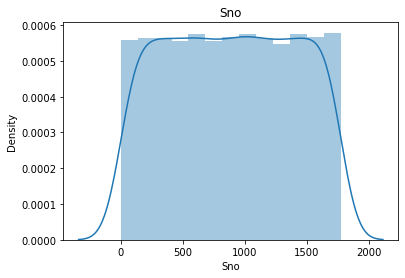

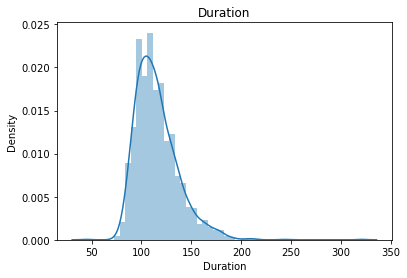

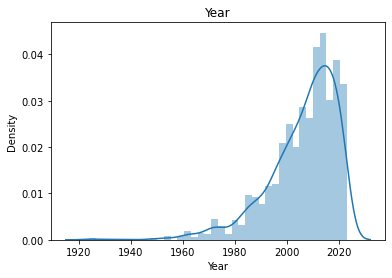

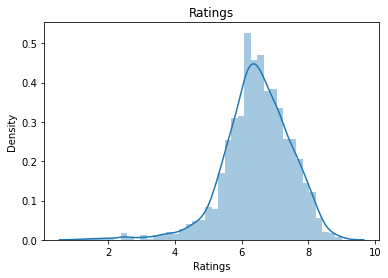

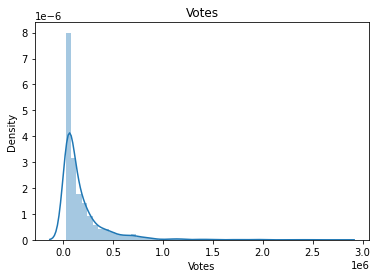

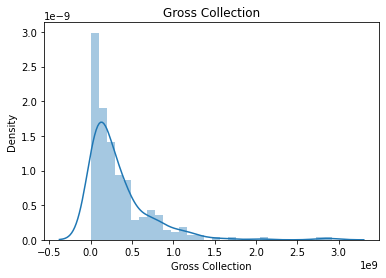

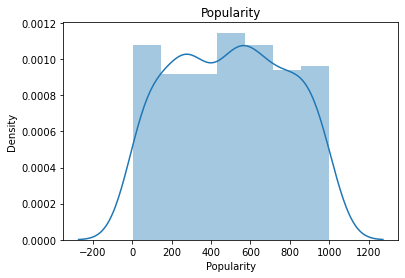

In [169]:
# Now let's check the distribution of data we will use for loop for that
for i in num:
    plt.title(i)
    sns.distplot(df[i])
    plt.show()

In [170]:
# now let's visualize the object data
# first we will make a list of all object data type columns
# we will use list concatenation for that

obj = [i for i in df.columns if df[i].dtypes == 'O']

In [171]:
obj

['Movie Name',
 'Director Name',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'Genre1',
 'Genre2',
 'Genre3',
 'Certification']

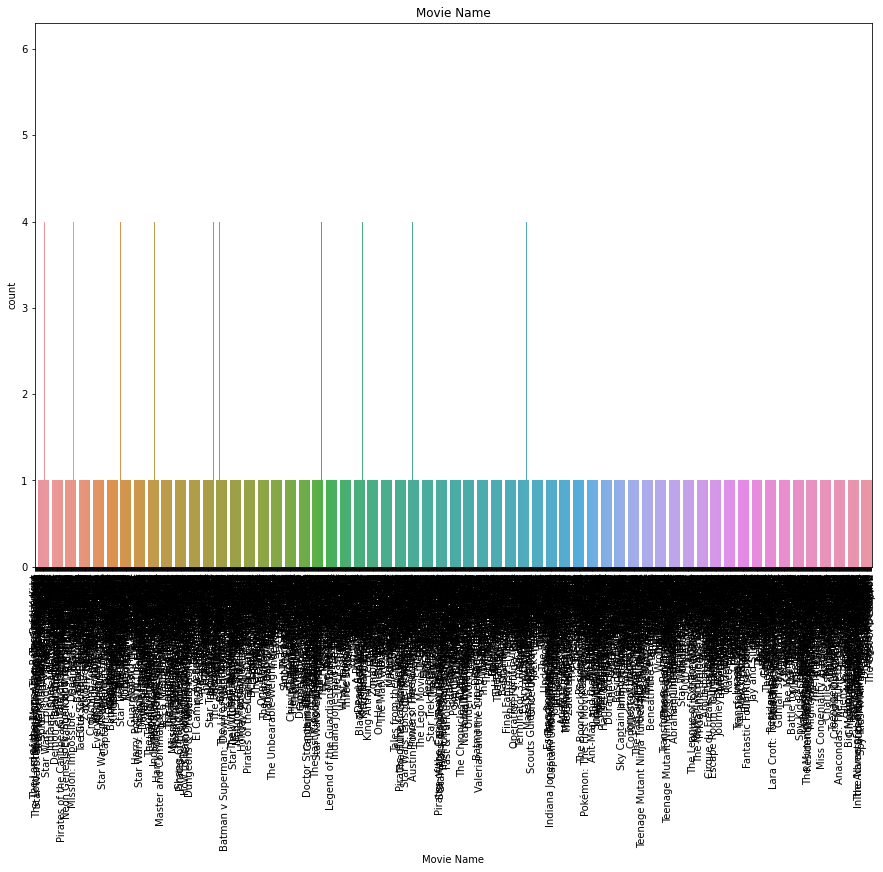

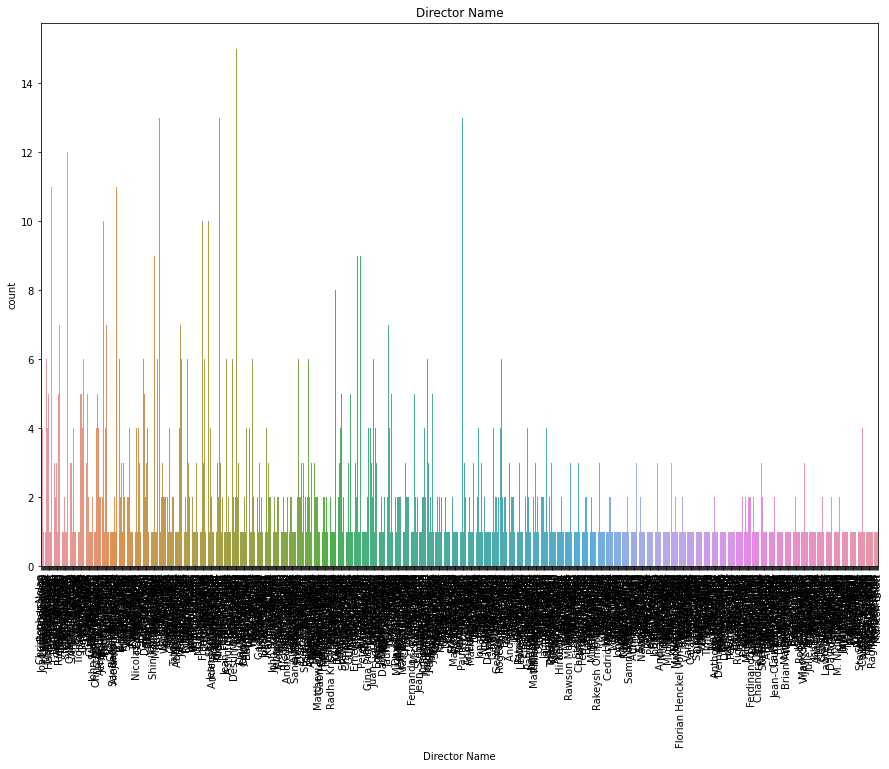

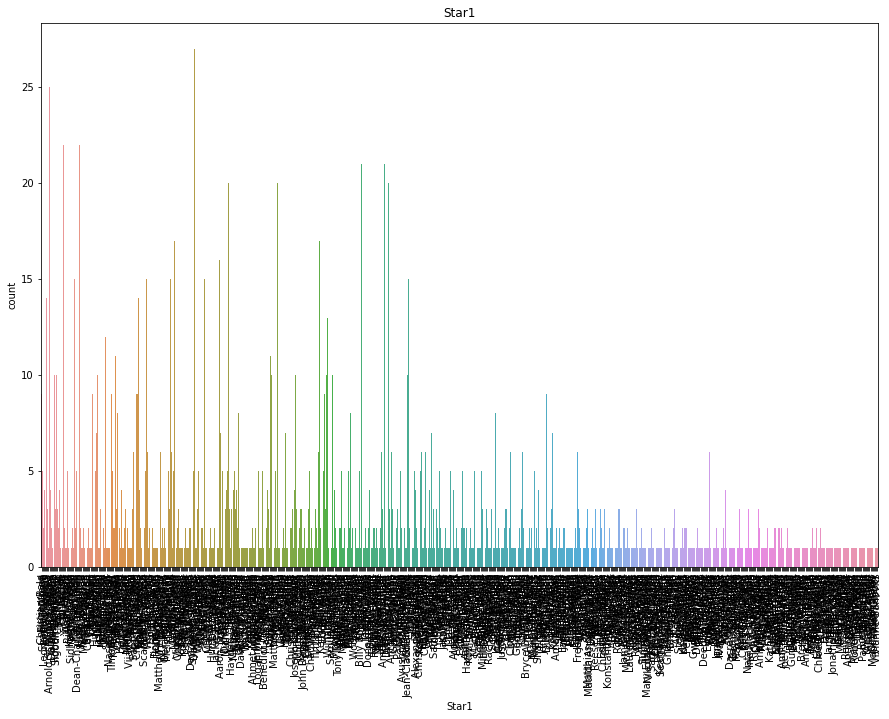

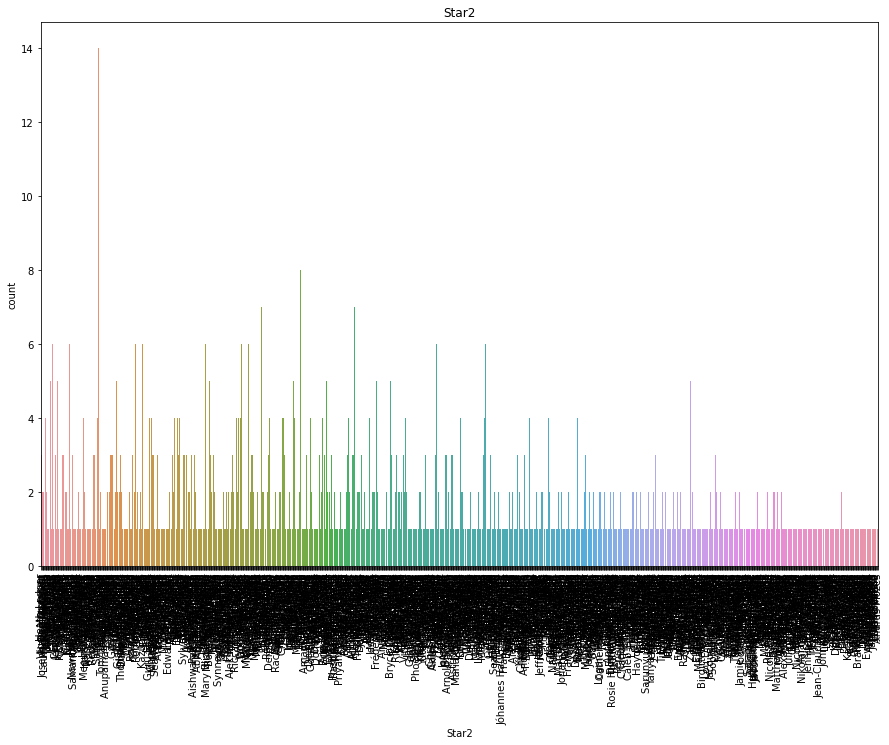

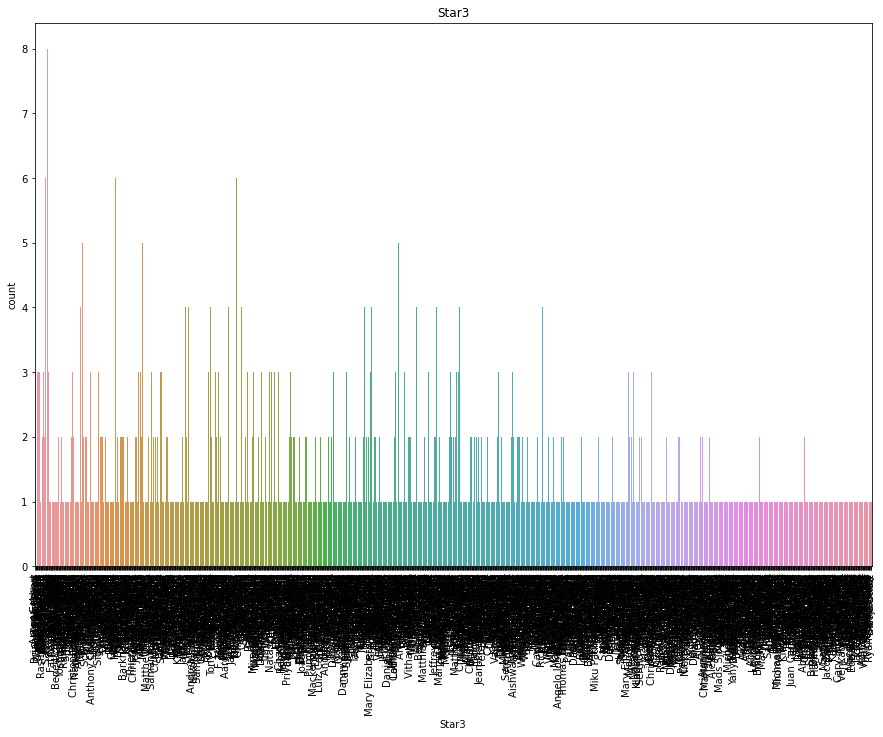

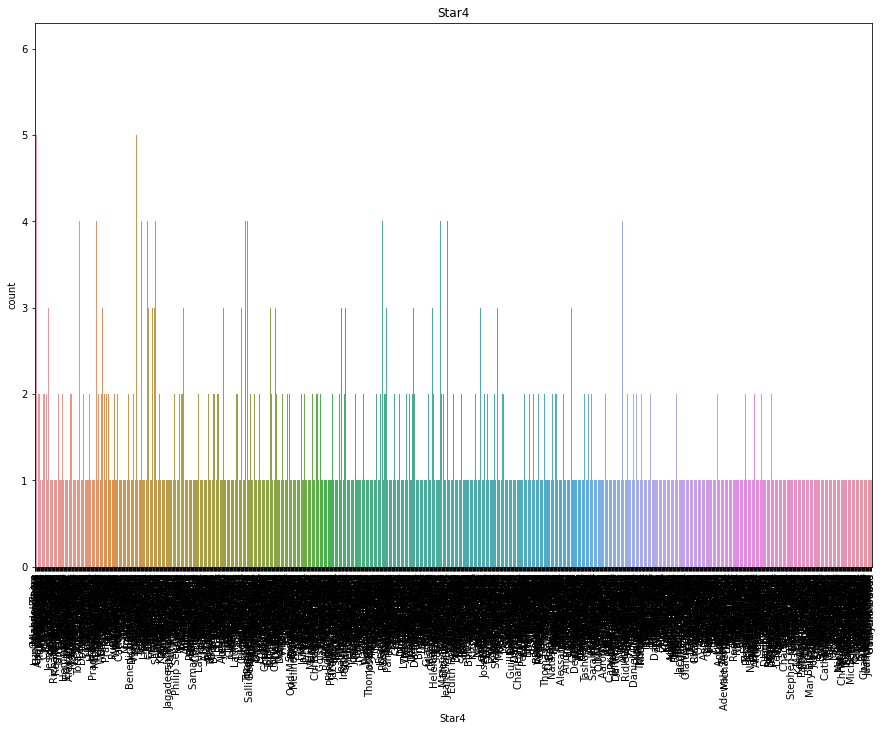

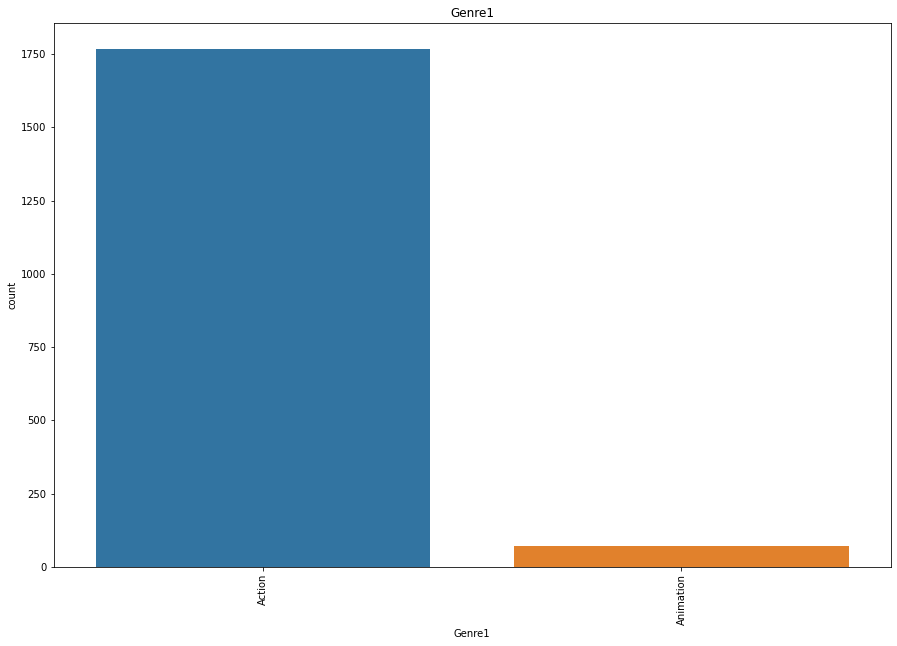

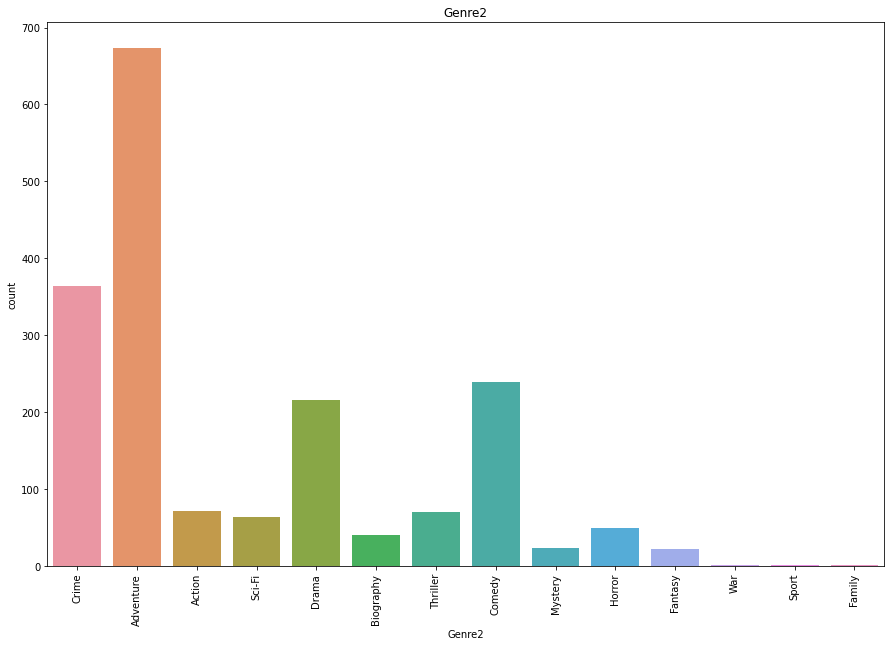

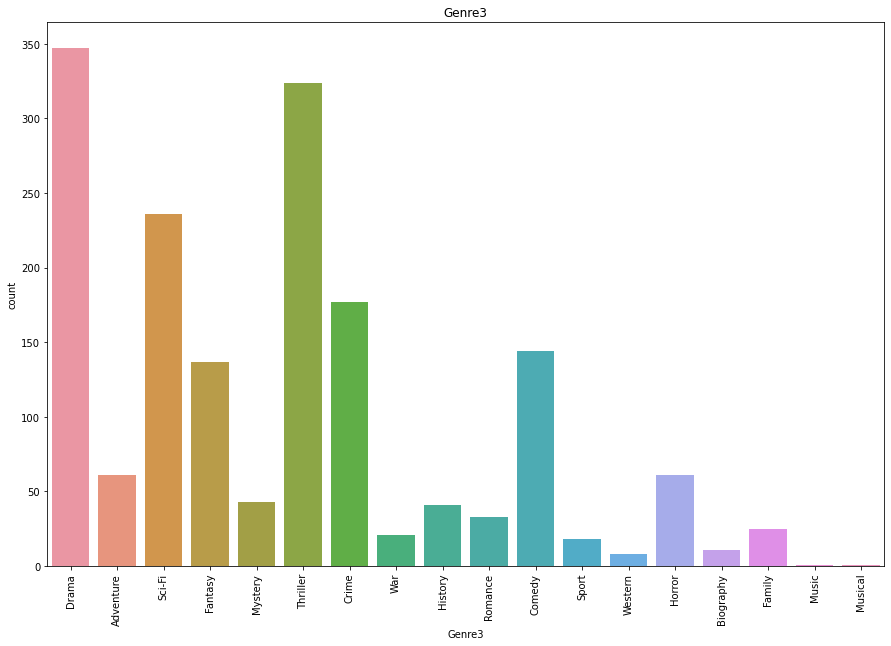

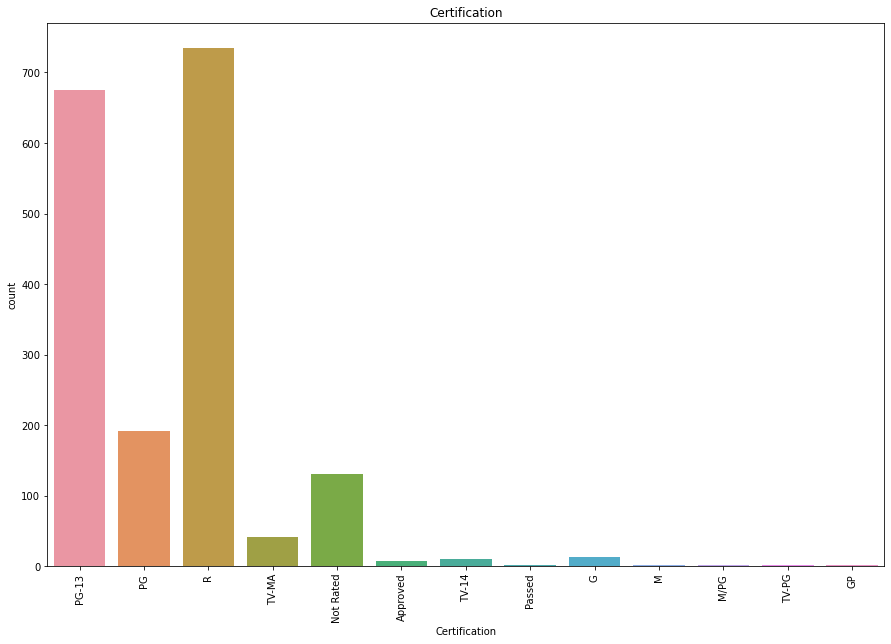

In [172]:
# we will use countplot to visualize the movies
# we will use for loop to do it
for i in obj:
    plt.figure(figsize = (15,10))
    plt.title(i)
    plt.xticks(rotation = 90)
    sns.countplot(df[i])
    plt.show()

Observations:

1: Most of the movies were made in only one part very few movies which were made in more than 3 parts.

2: Very few directors who directed more than 10 movies from the list.

3: Lily Wachowski and Joe Russo had worked more times compare to others as 2nd director.

4: There are very few lead stars who appeared in more than 5 movies from the list.

5: More number of movies were made in Action Genre.

6: The 2nd most popular genre is Adventure followed by Crime.

7: The 3rd most popular genre is Drama followed by Thriller.

8: Most of the movies are certified R followed by PG-13.

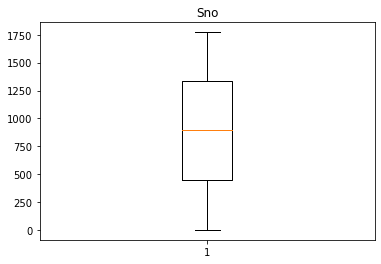

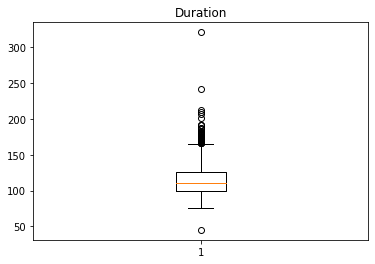

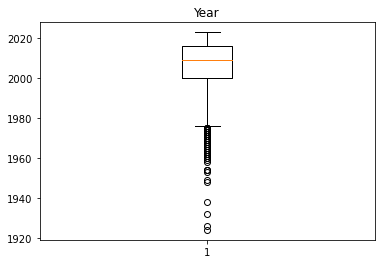

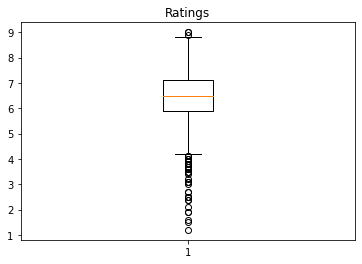

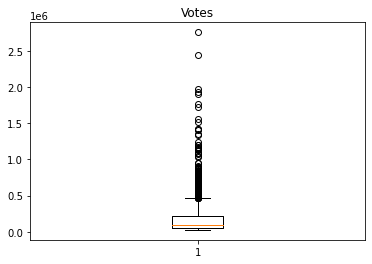

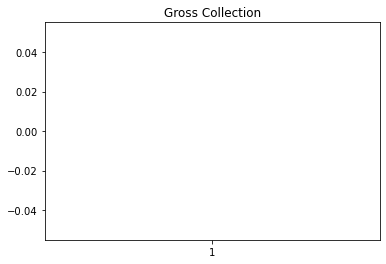

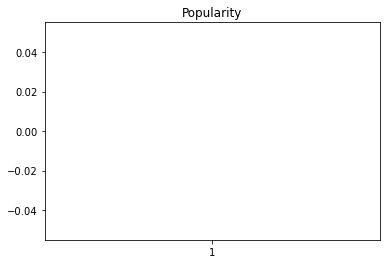

In [173]:
# Let's do the boxplot analysis of numeric data
for i in num:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

Observations:

1: Most movies have runtime duration between 75 mins to 150 mins very few movies have runtime more than that.

2: Most of the movies were made in after year 2000 before that very few movies were made.

3: The average rating of movies from list is 6.5.

4: Average voting of movies are done by 1 to 2 lakh people.

In [174]:
# Top 10 years when there was highest average voting

highest_voting = df.groupby('Year')['Votes'].mean().sort_values(ascending = False)
voting = pd.DataFrame(highest_voting[ : 10])
voting = voting.reset_index()

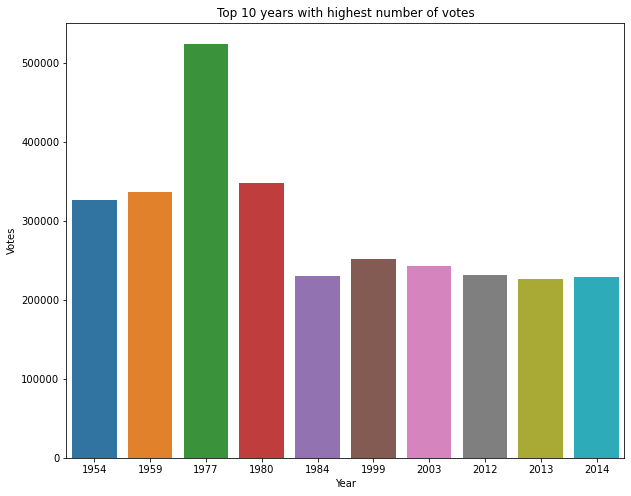

In [175]:
# let's visualize it using barplot
plt.figure(figsize = (10,8))
plt.title('Top 10 years with highest number of votes')
sns.barplot(x = 'Year', y = 'Votes', data = voting)
plt.show()

In [176]:
#Here we can see the years in which the more number of people have done the votings as compare to other years from which the highest number of voting is done in year 1977 by more than 5L people.

In [177]:
#Top 10 years when there was highest gross collection done by movies

collection = df.groupby('Year')['Gross Collection'].mean().sort_values(ascending = False)
top_collection = pd.DataFrame(collection[ : 10])
top_collection = top_collection.reset_index()

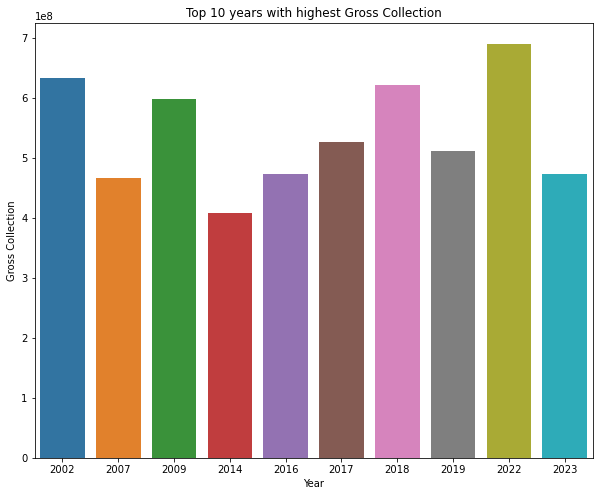

In [178]:
# let's visualize it
plt.figure(figsize = (10, 8))
plt.title('Top 10 years with highest Gross Collection')
sns.barplot(x = 'Year', y = 'Gross Collection', data = top_collection)
plt.show()

In year 2022 movies have done highest gross collection.

Top 10 years with highest average movies popularity

In [179]:
highest_popularity = df.groupby('Year')['Popularity'].mean().sort_values(ascending = False)
popularity = pd.DataFrame(highest_popularity[ : 10])
popularity = popularity.reset_index()

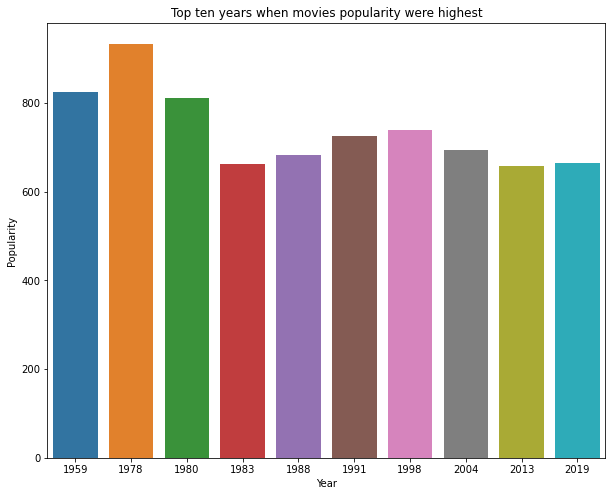

In [180]:
plt.figure(figsize = (10, 8))
plt.title('Top ten years when movies popularity were highest')
sns.barplot(x = 'Year', y = 'Popularity', data = popularity)
plt.show()

In [182]:
# Top 10 director according to ratings.

top_directors = df.groupby('Director Name')['Ratings'].mean().sort_values(ascending  = False)
top10_directors = pd.DataFrame(top_directors[ : 10])
top10_directors = top10_directors.reset_index()

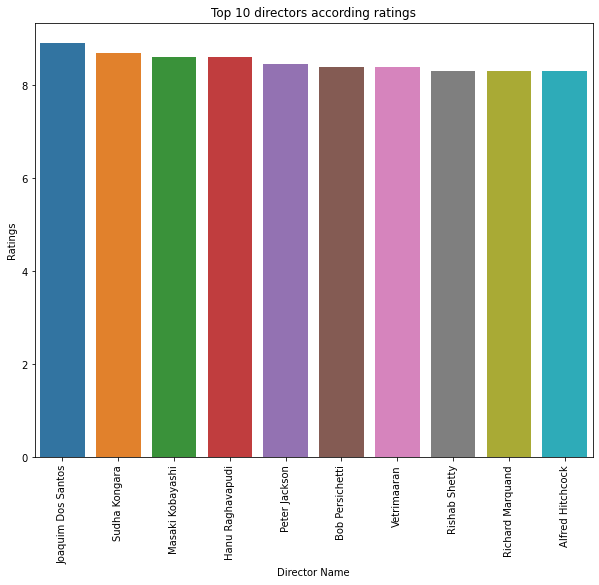

In [184]:
# let's visualize it
plt.figure(figsize = (10, 8))
plt.title('Top 10 directors according ratings')
plt.xticks(rotation = 90)
sns.barplot(x = 'Director Name', y = 'Ratings', data = top10_directors)
plt.show()

In [186]:
# Top 10 directors whose movies have done highest gross collection

dir_coll = df.groupby('Director Name')['Gross Collection'].mean().sort_values(ascending = False)
dir10_coll = pd.DataFrame(dir_coll[ : 10])
dir10_coll = dir10_coll.reset_index()

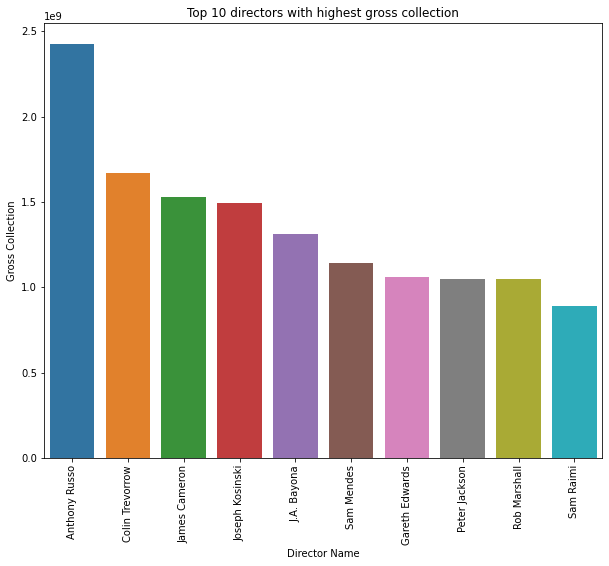

In [187]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 directors with highest gross collection')
plt.xticks(rotation = 90)
sns.barplot(x = 'Director Name', y = 'Gross Collection', data = dir10_coll)
plt.show()


In [188]:
# Top 10 movies with highest average ratings.

top_movies = df.groupby('Movie Name')['Ratings'].mean().sort_values(ascending = False)
top10_movies = pd.DataFrame(top_movies[ : 10])
top10_movies = top10_movies.reset_index()

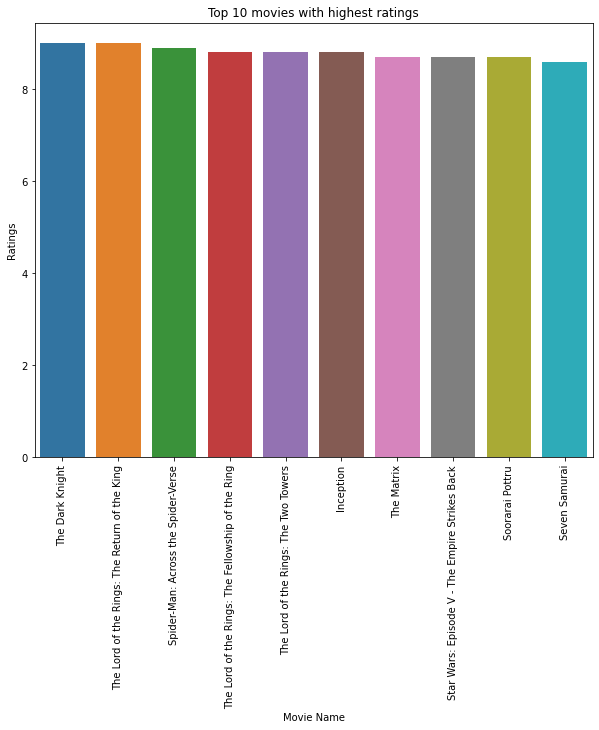

In [189]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 movies with highest ratings')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Ratings', data = top10_movies)
plt.show()

In [190]:
# Top 10 movies with longest Duration.
top_movies_duration = df.groupby('Movie Name')['Duration'].mean().sort_values(ascending = False)
top10_movies_duration = pd.DataFrame(top_movies_duration[ : 10])
top10_movies_duration = top10_movies_duration.reset_index()

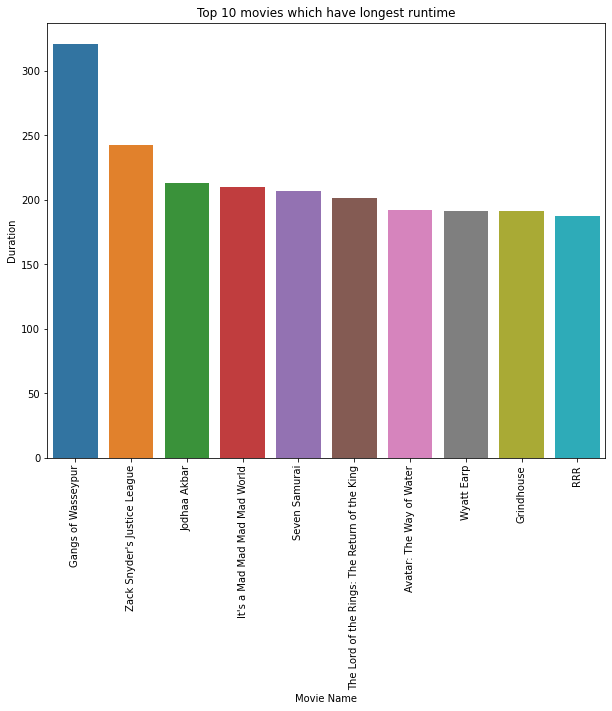

In [191]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 movies which have longest runtime')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Duration', data = top10_movies_duration)
plt.show()

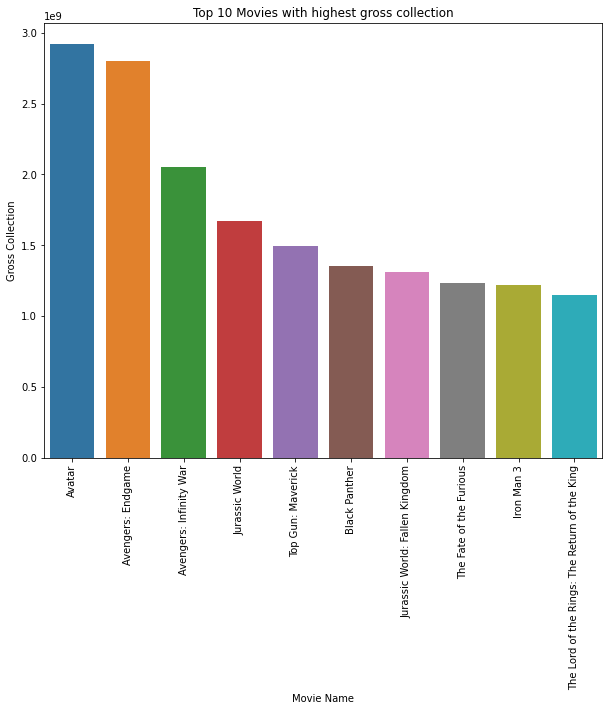

In [192]:
# Top 10 movies with highest Gross Collection

top_collection = df.groupby('Movie Name')['Gross Collection'].mean().sort_values(ascending = False)
top10_collection = pd.DataFrame(top_collection[:10])
top10_collection = top10_collection.reset_index()

plt.figure(figsize = (10,8))
plt.title('Top 10 Movies with highest gross collection')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Gross Collection', data = top10_collection)
plt.show()

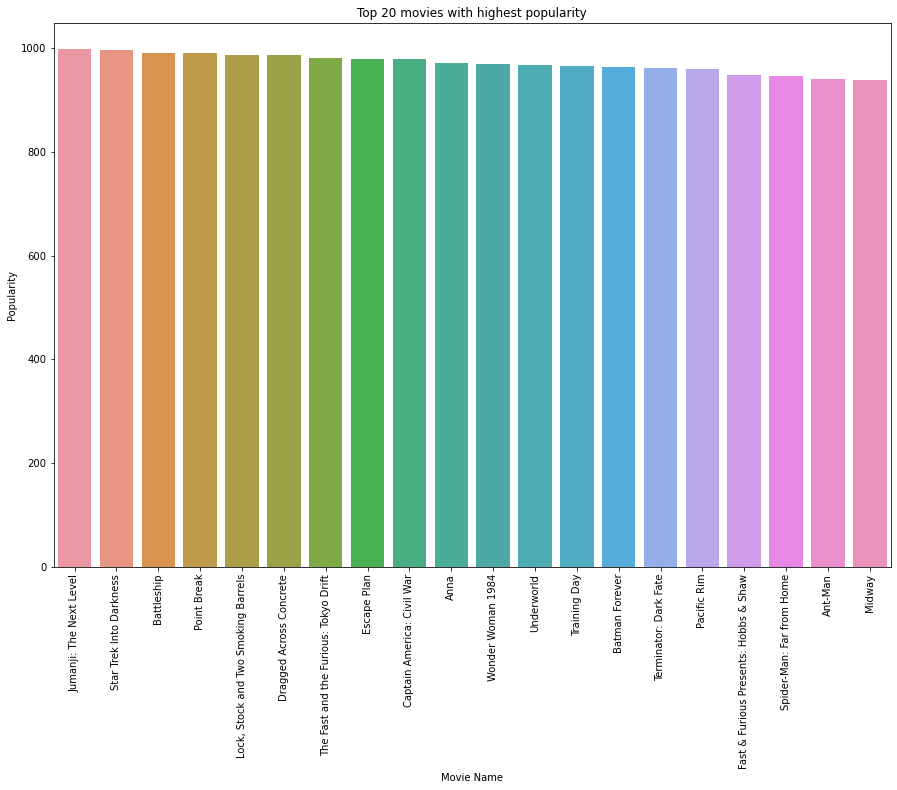

In [194]:
# Top 20 movies with highest popularity

top_movie_popularity = df.groupby('Movie Name')['Popularity'].mean().sort_values(ascending = False)
top20_movie_popularity = pd.DataFrame(top_movie_popularity[ : 20])
top20_movie_popularity = top20_movie_popularity.reset_index()

plt.figure(figsize = (15, 10))
plt.title('Top 20 movies with highest popularity')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Popularity', data = top20_movie_popularity)
plt.show()

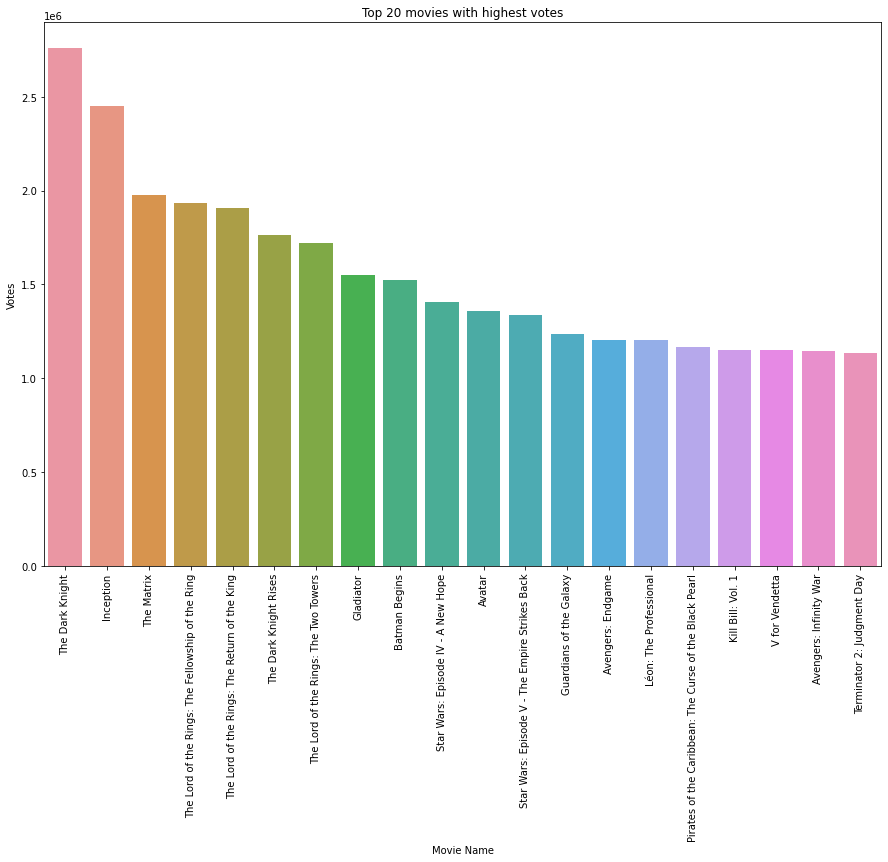

In [195]:
# Top 20 movies with highest votes

top_movie_votes = df.groupby('Movie Name')['Votes'].mean().sort_values(ascending = False)
top20_movie_votes = pd.DataFrame(top_movie_votes[ : 20])
top20_movie_votes = top20_movie_votes.reset_index()

plt.figure(figsize = (15, 10))
plt.title('Top 20 movies with highest votes')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Votes', data = top20_movie_votes)
plt.show()

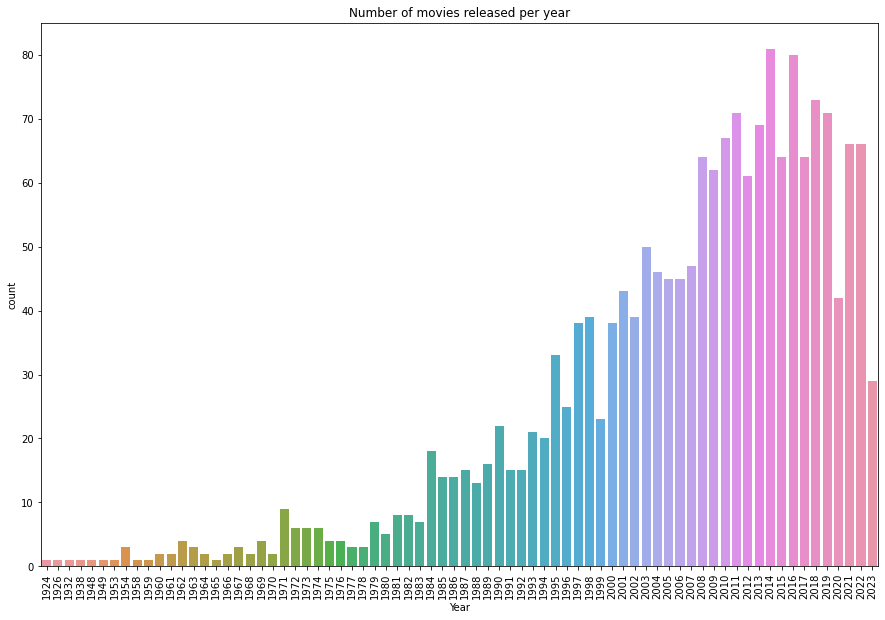

In [196]:
# Movies released per year

plt.figure(figsize = (15,10))
plt.title('Number of movies released per year')
plt.xticks(rotation = 90)
sns.countplot(x = 'Year', data = df)
plt.show()

Here we can in early years there were very less movies released in one year but after year 2000 the number of movie release were increased and now there were more than 40 movies releases per year and it is increasing.

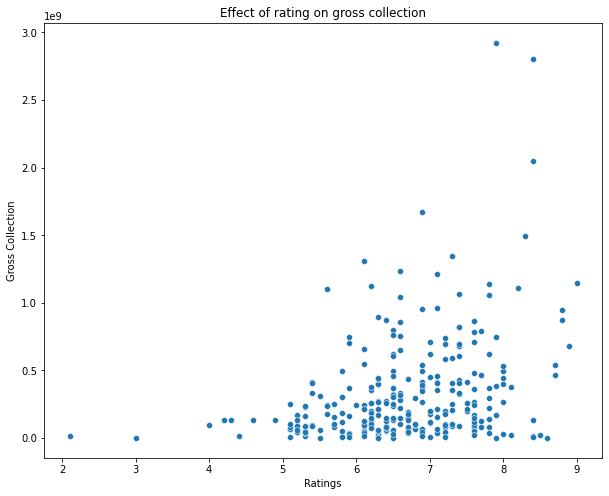

In [197]:
# Does Rating affect the gross collection

plt.figure(figsize = (10, 8))
plt.title('Effect of rating on gross collection')
sns.scatterplot(x = 'Ratings', y = 'Gross Collection', data = df)
plt.show()

Here we can see most of the movies which have done the higher gross collection have ratings more than 6



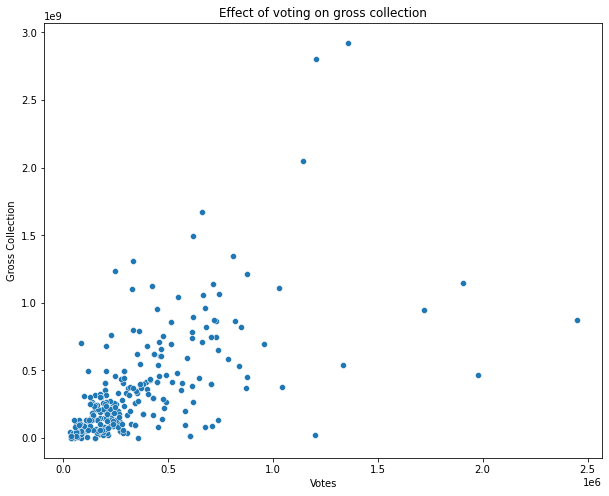

In [198]:
# Does voting affect the gross collection
plt.figure(figsize = (10, 8))
plt.title('Effect of voting on gross collection')
sns.scatterplot(x = 'Votes', y = 'Gross Collection', data = df)
plt.show()

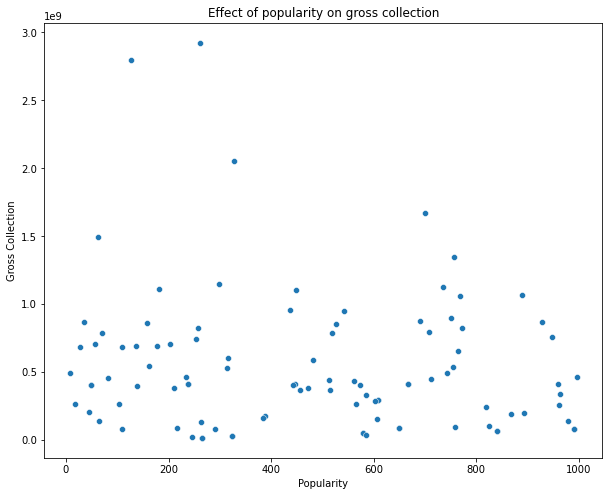

In [199]:
# Does Popularity affect the gross collection

plt.figure(figsize = (10, 8))
plt.title('Effect of popularity on gross collection')
sns.scatterplot(x = 'Popularity', y = 'Gross Collection', data = df)
plt.show()

Here we can see that popularity is showing the mixed relation with gross collection even some movies with less popularity score have done the higher gross collection.

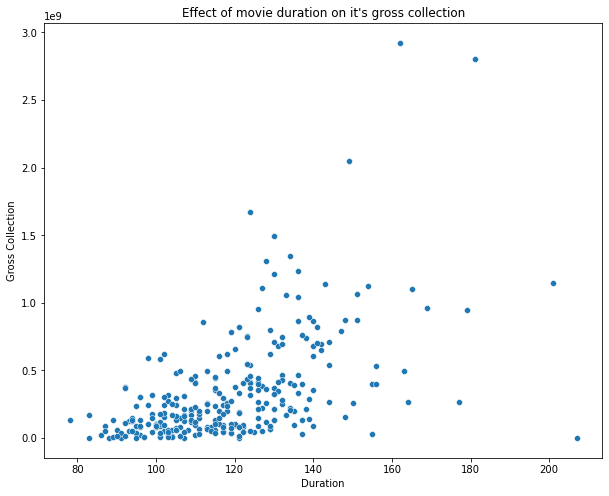

In [200]:
# Does duration of movie affect the gross collection

plt.figure(figsize = (10, 8))
plt.title("Effect of movie duration on it's gross collection")
sns.scatterplot(x = 'Duration', y = 'Gross Collection', data = df)
plt.show()

Movies of duration nearby 120 mins have quitely more average gross collection than movies of duration less than that and few movies of duration more than that alos have done more gross collection.

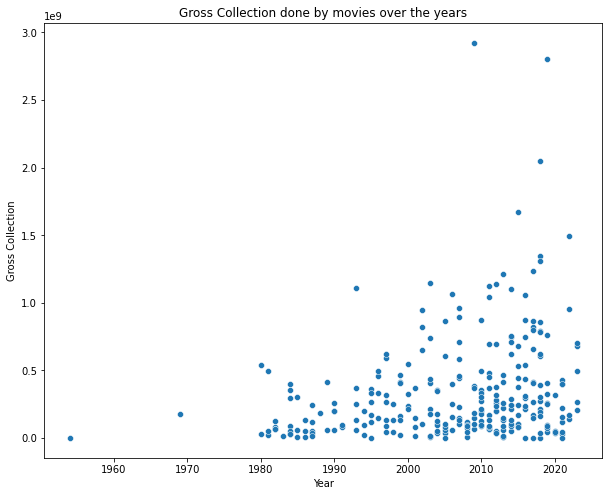

In [201]:
# Gross collection done by movies over the years

plt.figure(figsize = (10, 8))
plt.title('Gross Collection done by movies over the years')
sns.scatterplot(x = 'Year', y = 'Gross Collection', data = df)
plt.show()

From here we can understand that in recent years more movies have done the high gross collection as compare to before.



In [203]:
# Top 10 highest rated movies and it's director
top10 = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Director Name']]

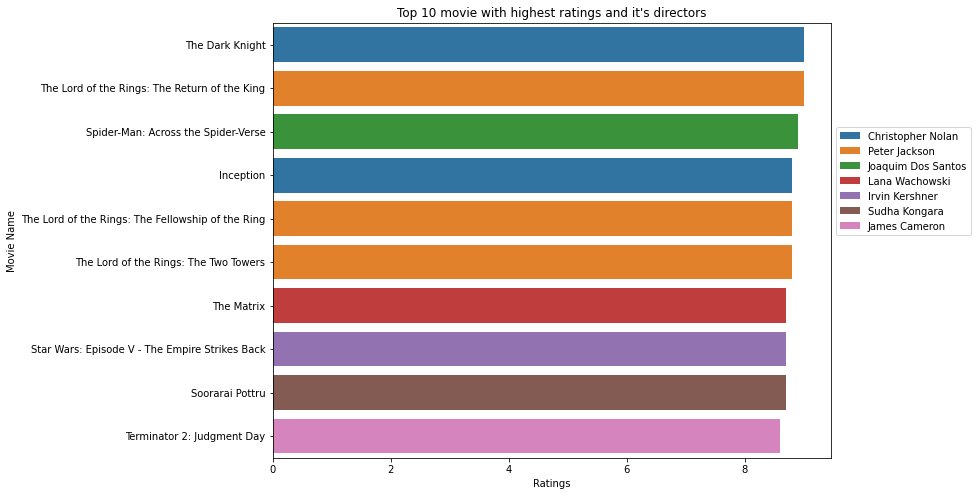

In [205]:
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and it's directors")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Director Name', data = top10, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

In [206]:
# These are the top to movies with highest ratings and their directors.

top10_gross = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Director Name']]

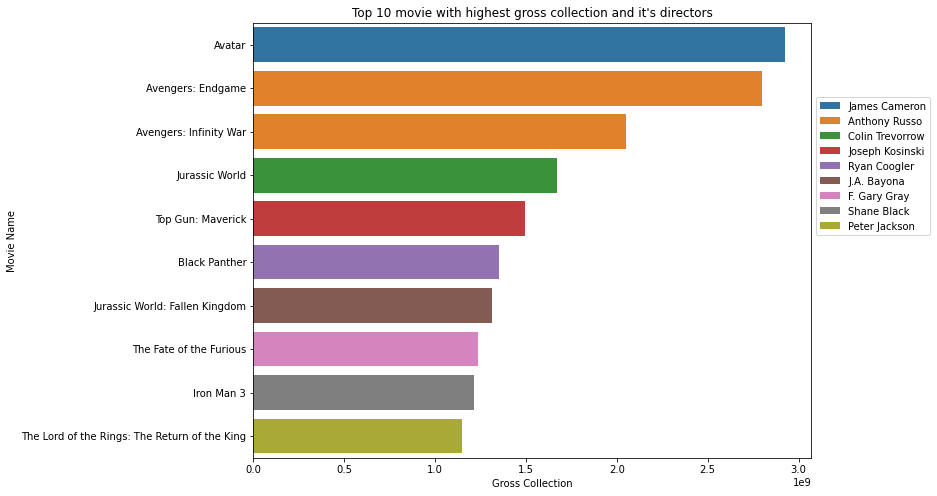

In [208]:
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's directors")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Director Name', data = top10_gross, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

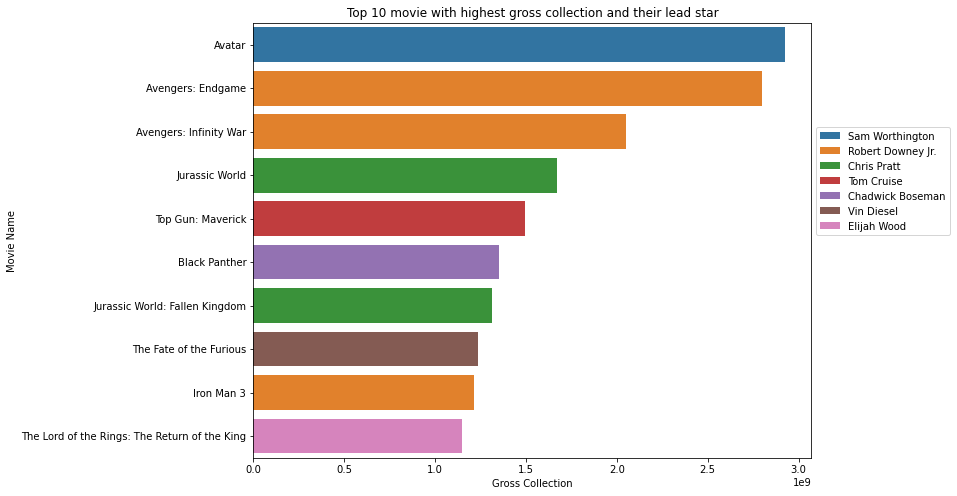

In [209]:
# Top 10 movies with highest gross collection and their lead star

top10_gross_star = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Star1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and their lead star")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Star1', data = top10_gross_star, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

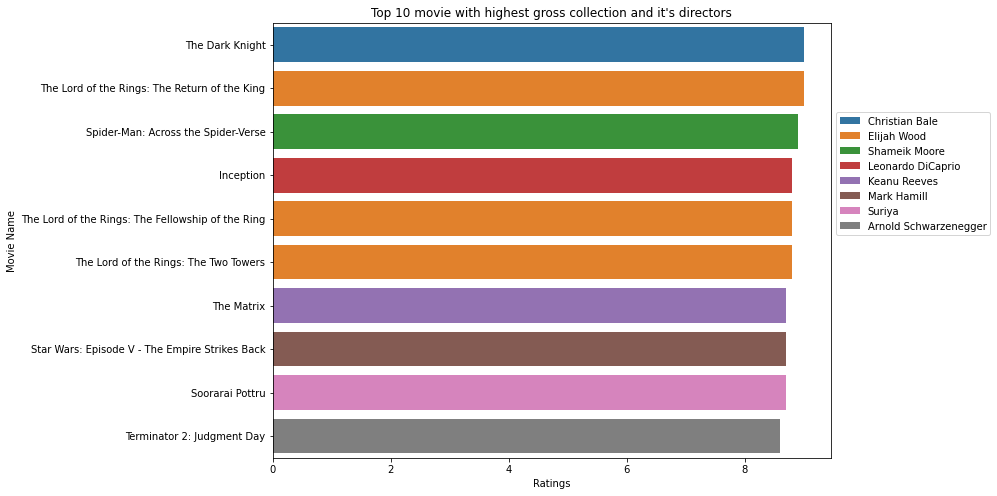

In [210]:
# Top 10 movie with highest ratings and their lead star

top10_rating_star = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Star1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's directors")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Star1', data = top10_rating_star, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

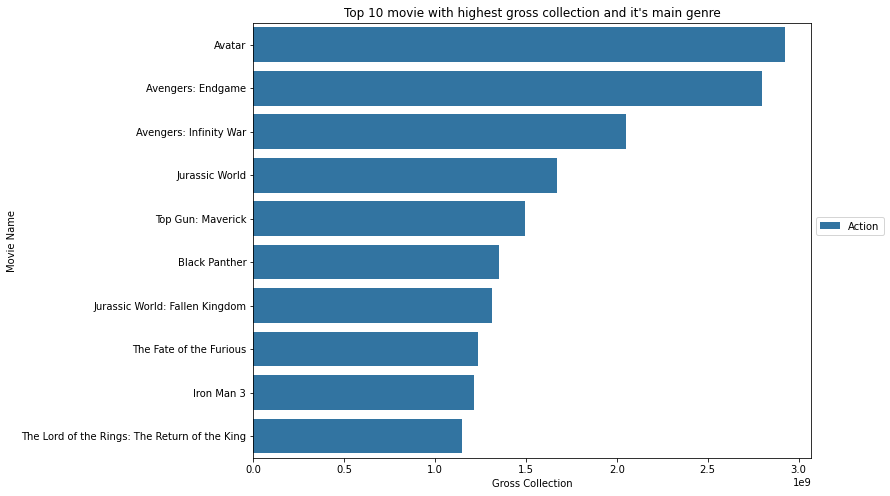

In [211]:
# Top 10 movies with highest gross collection and their genre

top10_gross_genre = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Genre1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's main genre")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Genre1', data = top10_gross_genre, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

The main genre of top 10 highest gross collection movie is Action.

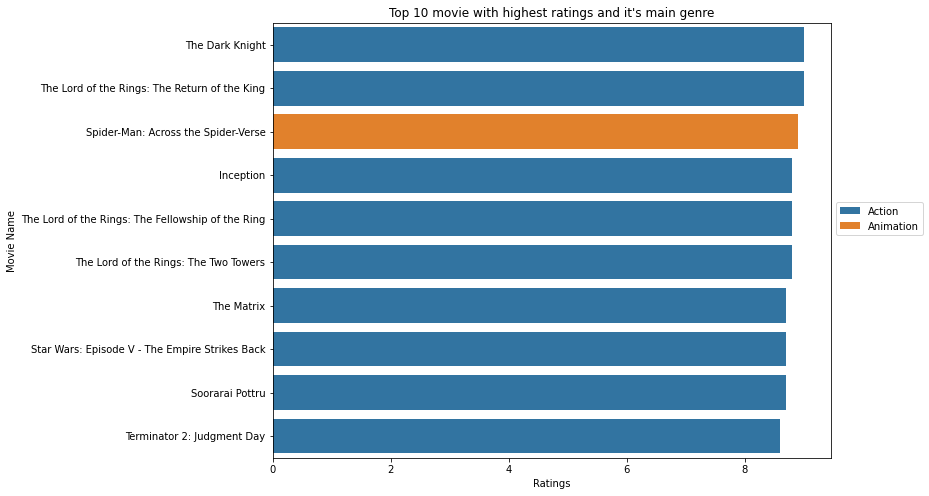

In [212]:
# Top 10 movies with highest ratings and its main genre

top10_ratings_genre = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Genre1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and it's main genre")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Genre1', data = top10_ratings_genre, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

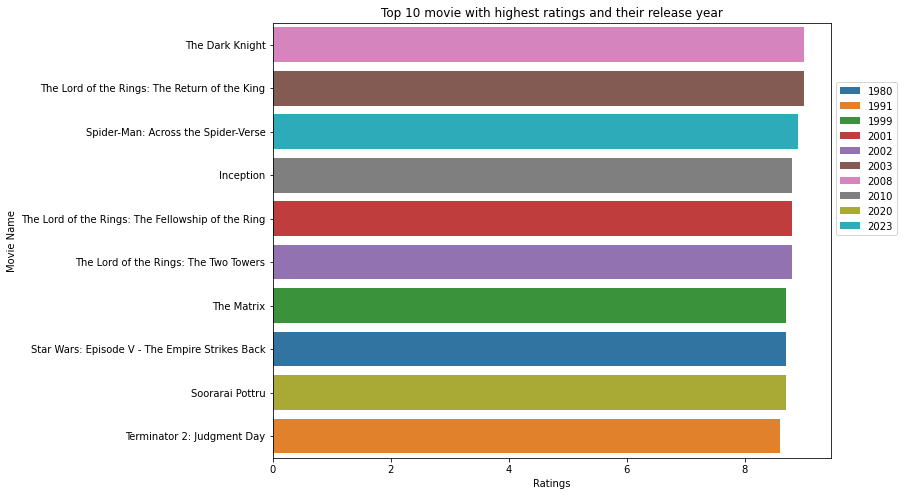

In [213]:
# Top 10 highest rating movie and their release year.

top10_ratings_year = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Year']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and their release year")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Year', data = top10_ratings_year, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

These are the movies which have highest ratings and their release year.

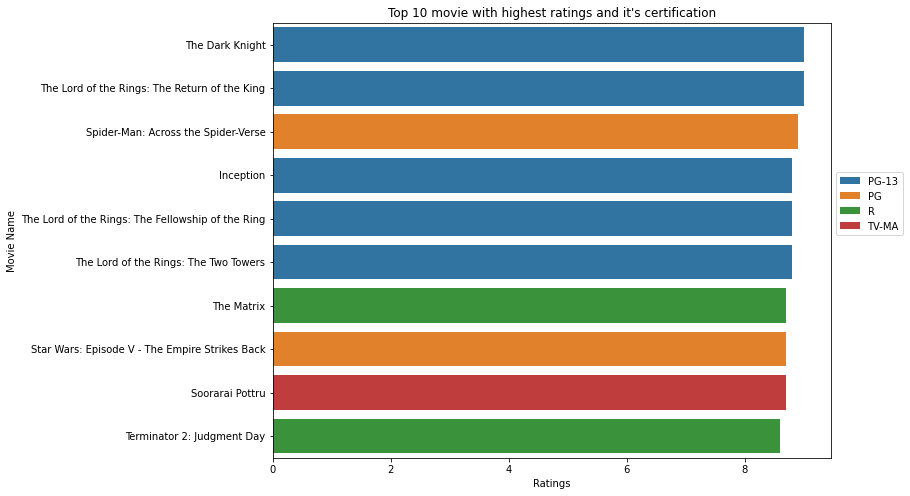

In [214]:
#Top 10 highest rating movie and their certification.

top10_ratings_certification = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Certification']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and it's certification")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Certification', data = top10_ratings_certification, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

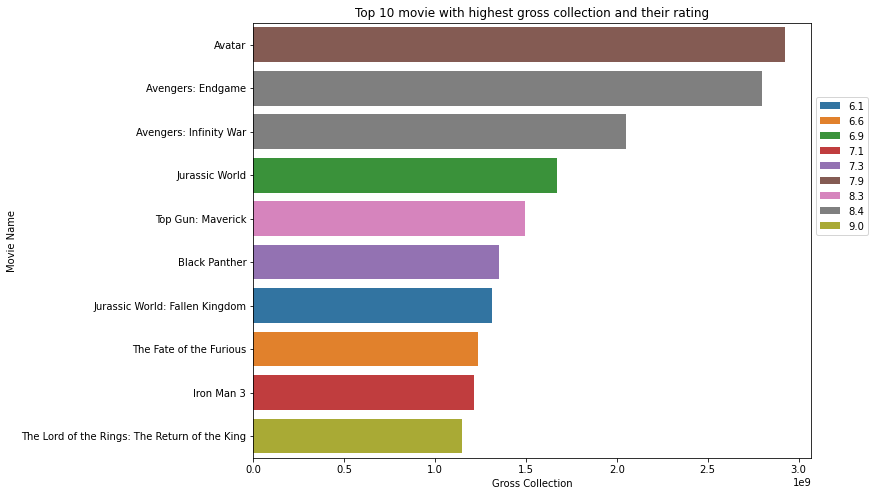

In [215]:
# Top 10 movies with highest gross collection and their ratings

top10_gross_rating = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Ratings']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and their rating")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Ratings', data = top10_gross_rating, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

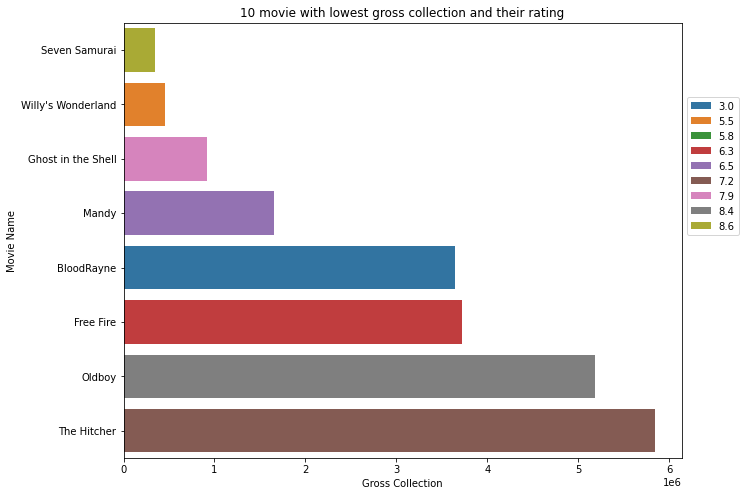

In [216]:
# 10 movies with lowest gross collection and their ratings

below10_gross_rating = df.nsmallest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Ratings']]
plt.figure(figsize = (10, 8))
plt.title("10 movie with lowest gross collection and their rating")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Ratings', data = below10_gross_rating, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

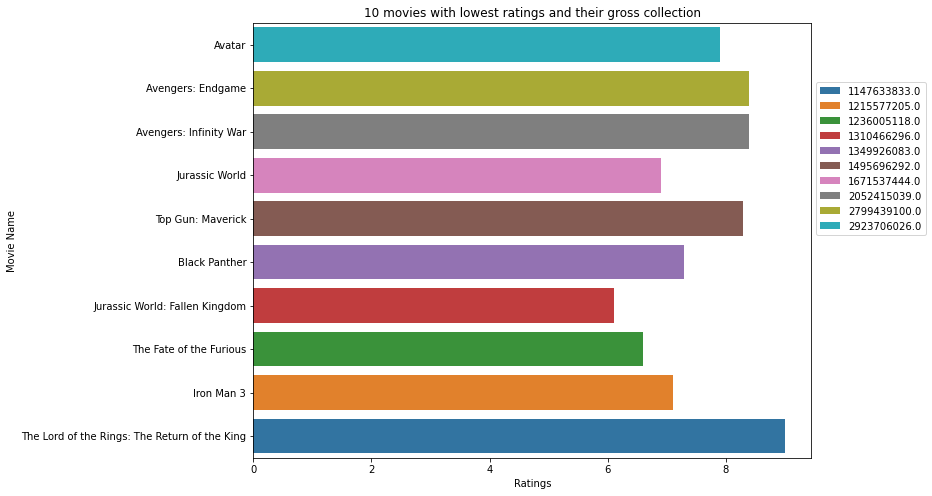

In [217]:
# 10 Movies with lowest ratings and their gross collection

below10_rating_gross = df.nsmallest(10, 'Ratings')[['Movie Name', 'Gross Collection', 'Ratings']]
plt.figure(figsize = (10, 8))
plt.title("10 movies with lowest ratings and their gross collection")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Gross Collection', data = top10_gross_rating, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

These are the movies which have lowest ratings and their gross collection. The gross collection are also not much higher.

Phase 4: Machine Learning

In [218]:
# First we will make a copy of our original dataframe
copydf = df.copy()

In [219]:
# Columns Sno and Movie Name doesn't have to do something with the target column they were different for every index 
# so we will drop them
copydf.drop('Sno', axis = 1, inplace = True)
copydf.drop('Movie Name', axis = 1, inplace = True)

In [220]:
# filling nan values
copydf['Star2'].fillna(copydf['Star2'].mode()[0], inplace = True)
copydf['Star3'].fillna(copydf['Star3'].mode()[0], inplace = True)
copydf['Star4'].fillna(copydf['Star4'].mode()[0], inplace = True)
copydf['Genre2'].fillna(copydf['Genre2'].mode()[0], inplace = True)
copydf['Genre3'].fillna(copydf['Genre3'].mode()[0], inplace = True)
copydf['Certification'].fillna(copydf['Certification'].mode()[0], inplace = True)

In [221]:
# checking for null values after filling them
copydf.isnull().sum()

Director Name          0
Duration               0
Year                   0
Ratings                0
Star1                  0
Star2                  0
Star3                  0
Star4                  0
Votes                  0
Genre1                 0
Genre2                 0
Genre3                 0
Gross Collection    1554
Popularity          1532
Certification          0
dtype: int64

Here we can see all columns which contains less null values we have filled them and for the rest two columns we will try different approaches and then we will evaluate its effect on our model performance.

In [222]:
# Encoding

# making a list of columns which contains less number of unique features
less_uni = ['Genre1', 'Genre2', 'Genre3', 'Certification']

In [223]:
# importing the required library
from sklearn.preprocessing import LabelEncoder

In [224]:
# holding it in a variable
le = LabelEncoder()

In [225]:
# we will use for loop to encode only selected columns of the dataframe
for i in less_uni:
    copydf[i] = le.fit_transform(copydf[i])

In [226]:
# First let's get the total frequency of each director in descending order
director_value_counts = copydf['Director Name'].value_counts()

In [227]:
# now let's create a mapping dictionary
dir_encode = {dire: i + 1 for i, dire in enumerate(director_value_counts.index[:15])}

# now we will fill those values with the encoded values and rest all will be filled by 16
copydf['Director Name'] = copydf['Director Name'].map(dir_encode).fillna(16)

The Director column has encoded now we will encode the rest all columns in same way.

In [228]:
copydf.columns

Index(['Director Name', 'Duration', 'Year', 'Ratings', 'Star1', 'Star2',
       'Star3', 'Star4', 'Votes', 'Genre1', 'Genre2', 'Genre3',
       'Gross Collection', 'Popularity', 'Certification'],
      dtype='object')

In [229]:
# Encoding Star1 Column
star1_value_counts = copydf['Star1'].value_counts()
star1_encode = {st1: i + 1 for i, st1 in enumerate(star1_value_counts.index[:15])}
copydf['Star1'] = copydf['Star1'].map(star1_encode).fillna(16)

In [230]:
# Encoding star2 column

star2_value_counts = copydf['Star2'].value_counts()
star2_encode = {st2: i + 1 for i, st2 in enumerate(star2_value_counts.index[:15])}
copydf['Star2'] = copydf['Star2'].map(star2_encode).fillna(16)

In [231]:
# Encoding star3 column

star3_value_counts = copydf['Star3'].value_counts()
star3_encode = {st3: i + 1 for i, st3 in enumerate(star3_value_counts.index[:15])}
copydf['Star3'] = copydf['Star3'].map(star3_encode).fillna(16)

In [232]:
# Encoding star4 column

star4_value_counts = copydf['Star4'].value_counts()
star4_encode = {st4: i + 1 for i, st4 in enumerate(star4_value_counts.index[:15])}
copydf['Star4'] = copydf['Star4'].map(star4_encode).fillna(16)

In [233]:
# Encoding Year column

# we will make a use defined function for this
def year(year):
    if year>2023:
        return 0
    
    elif year == 2023:
        return 1
    
    elif year == 2022:
        return 2
    
    elif year == 2021:
        return 3
    
    elif year == 2020:
        return 4
    
    elif year == 2019:
        return 5
    
    elif year == 2018:
        return 6
    
    elif year == 2017:
        return 7
    
    elif year == 2016:
        return 8
    
    elif year == 2015:
        return 9
    
    elif year == 2014:
        return 10
    
    else:
        return 11

In [234]:
# now we will apply this function to the dataframe
copydf['Year'] = copydf['Year'].apply(year)

In [235]:
# Outliers

# importing library
from scipy.stats import zscore

In [236]:
# checking for zscore values of every data
z = np.abs(zscore(copydf))

In [237]:
# assigning threshold value and finding the data whose threshold value is greater than 3
threshold = 3
out = np.where(z>3)

In [238]:
# Let's check how much data will be lost 
pd.DataFrame(out).shape

(2, 494)

In [239]:
# shape of original dataframe
copydf.shape

(1839, 15)

In [240]:
# data loss
data_loss = ((1839-1345)/1839)*100
data_loss

26.86242523110386

Here we can see after removing the outliers our 30% data will be lost and it is not acceptable range of data loss so we will not remove the outliers.

In [241]:
# filling nan values

# making copy of the dataframe
newdf1 = copydf.copy()

# filling nan values with forward fill method
newdf1['Gross Collection'].fillna(method = 'ffill', inplace = True)
newdf1['Popularity'].fillna(method = 'ffill', inplace = True)

In [242]:
# splitting the data into input and target
newdf1_x = newdf1.drop('Votes', axis = 1)
newdf1_y = newdf1['Votes']

In [243]:
# importing library
from sklearn.preprocessing import PowerTransformer

In [244]:
# making instance of this
pt = PowerTransformer()

In [245]:
# sending input data to transform into normal distribution
normal = pt.fit_transform(newdf1_x)

newdf1_inp_x = pd.DataFrame(normal, columns = newdf1_x.columns)

In [246]:
# Scaling

# importing the required library
from sklearn.preprocessing import StandardScaler

# holding them into instance
ssc = StandardScaler()

In [247]:
# passing input data for scaling
scaled = ssc.fit_transform(newdf1_inp_x)

# making pandas dataframe of output data
newdf1_x1 = pd.DataFrame(scaled, columns = newdf1_inp_x.columns)

In [248]:
# Model building

# importing regression algorithms and validation matrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# importing validation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [258]:
# making instance of models
lr1 = LinearRegression()
svr1 = SVR()
dtr1 = DecisionTreeRegressor()
knn1 = KNeighborsRegressor()
rfr1 = RandomForestRegressor()

In [259]:
# splitting the data at random state 29
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(newdf1_x1, newdf1_y, test_size = 0.20, random_state = 29)

In [260]:
# checking shape of data
print('Input training data shape:', X_train1.shape)
print('Target trainig data shape:', Y_train1.shape)
print('Input test data shape:', X_test1.shape)
print('Target test data shape:', Y_test1.shape)

Input training data shape: (1471, 14)
Target trainig data shape: (1471,)
Input test data shape: (368, 14)
Target test data shape: (368,)


In [261]:
# first we will make a list of all models

model22 = [lr4, dtr4, svr4, knn4, rfr4]


# Model training: predict gross collection

dtr4.fit(X_train4, Y_train4)

# checking score on training data
dtr4.score(X_train4, Y_train4)

NameError: name 'lr4' is not defined